This notebook is an amalgam of different lessons on statistics for data analysis.  It is based on different resources found on the web, most notably the excellent tutorials by Mirko Stojiljković at https://realpython.com/python-statistics/


## Table of Contents <a id='toc'></a>

1. [Understanding Descriptive Statistics](#uds)
    1. [Types of Measures](#tom)
    2. [Population and Samples](#pas)
    3. [Outliers](#outliers)
2. [Choosing Python Statistics Libraries](#cpsl)
3. [Getting Started With Python Statistics Libraries](#gswp)
4. [Calculating Descriptive Statistics](#cds)
    1. [Measures of Central Tendency](#moct)
    2. [Measures of Variability](#mov)
    3. [Summary of Descriptive Statistics](#sods)
    4. [Measures of Correlation Between Pairs of Data](#mocd)
5. [Working With 2D Data](#2d)
    1. [Axes](#axes)
    2. [DataFrames](#df)
6. [Visualizing Data](#vd)
    1. [Box Plots](#bp)
    2. [Histograms](#hist)
    3. [Pie Charts](#pc)
    4. [Bar Charts](#bc)
    5. [X-Y Plots](#xyp)
    6. [Heatmaps](#heat)
7. [Conclusion](#conclusion)

## Descriptive Statistics <a id = 'uds'></a>

In the era of big data and artificial intelligence, data science and machine learning have become essential in many fields of science and technology. A necessary aspect of working with data is the ability to describe, summarize, and represent data visually. Python statistics libraries are comprehensive, popular, and widely used tools that will assist you in working with data.

In this tutorial, you’ll learn:

 * What numerical quantities you can use to describe and summarize your datasets
 * How to calculate descriptive statistics in pure Python
 * How to get descriptive statistics with available Python libraries
 * How to visualize your datasets

Descriptive statistics is about describing and summarizing data. It uses two main approaches:

 1. The quantitative approach describes and summarizes data numerically.
 2. The visual approach illustrates data with charts, plots, histograms, and other graphs.

You can apply descriptive statistics to one or many datasets or variables. When you describe and summarize a single variable, you’re performing univariate analysis. When you search for statistical relationships among a pair of variables, you’re doing a bivariate analysis. Similarly, a multivariate analysis is concerned with multiple variables at once.

[back to top](#toc)

### Types of Measures <a id='tom'></a>

In this tutorial, you’ll learn about the following types of measures in descriptive statistics:

  * Central tendency tells you about the centers of the data. Useful measures include the mean, median, and mode.
  * Variability tells you about the spread of the data. Useful measures include variance and standard deviation.
  * Correlation or joint variability tells you about the relation between a pair of variables in a dataset. Useful measures include covariance and the correlation coefficient.

You’ll learn how to understand and calculate these measures with Python.

### Population and Samples <a id='pas'></a>

In statistics, the population is a set of all elements or items that you’re interested in. Populations are often vast, which makes them inappropriate for collecting and analyzing data. That’s why statisticians usually try to make some conclusions about a population by choosing and examining a representative subset of that population.

This subset of a population is called a sample. Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.

### Outliers <a id='outliers'></a>

An outlier is a data point that differs significantly from the majority of the data taken from a sample or population. There are many possible causes of outliers, but here are a few to start you off:

  * Natural variation in data
  * Change in the behavior of the observed system
  * Errors in data collection

Data collection errors are a particularly prominent cause of outliers. For example, the limitations of measurement instruments or procedures can mean that the correct data is simply not obtainable. Other errors can be caused by miscalculations, data contamination, human error, and more.

There isn’t a precise mathematical definition of outliers. You have to rely on experience, knowledge about the subject of interest, and common sense to determine if a data point is an outlier and how to handle it.

[back to top](#toc)

## Choosing Python Statistics Libraries <a id='cpsl'></a>

There are many Python statistics libraries out there for you to work with, but in this tutorial, you’ll be learning about some of the most popular and widely used ones:

__Python’s statistics__ is a built-in Python library for descriptive statistics. You can use it if your datasets are not too large or if you can’t rely on importing other libraries.

__NumPy__ is a third-party library for numerical computing, optimized for working with single- and multi-dimensional arrays. Its primary type is the array type called ndarray. This library contains many routines for statistical analysis.

__SciPy__ is a third-party library for scientific computing based on NumPy. It offers additional functionality compared to NumPy, including scipy.stats for statistical analysis.

__pandas__ is a third-party library for numerical computing based on NumPy. It excels in handling labeled one-dimensional (1D) data with Series objects and two-dimensional (2D) data with DataFrame objects.

__Matplotlib__ is a third-party library for data visualization. It works well in combination with NumPy, SciPy, and pandas.

Note that, in many cases, Series and DataFrame objects can be used in place of NumPy arrays. Often, you might just pass them to a NumPy or SciPy statistical function. In addition, you can get the unlabeled data from a Series or DataFrame as a np.ndarray object by calling .values or .to_numpy().

[back to top](#toc)

## Getting Started With Python Statistics Libraries <a id='gsp'></a>

The built-in Python statistics library has a relatively small number of the most important statistics functions. The official documentation is a valuable resource to find the details. If you’re limited to pure Python, then the Python statistics library might be the right choice.

A good place to start learning about NumPy is the official User Guide, especially the quickstart and basics sections. The official reference can help you refresh your memory on specific NumPy concepts. While you read this tutorial, you might want to check out the statistics section and the official scipy.stats reference as well.

If you want to learn pandas, then the official Getting Started page is an excellent place to begin. The introduction to data structures can help you learn about the fundamental data types, Series and DataFrame. Likewise, the excellent official introductory tutorial aims to give you enough information to start effectively using pandas in practice.

matplotlib has a comprehensive official User’s Guide that you can use to dive into the details of using the library. Anatomy of Matplotlib is an excellent resource for beginners who want to start working with matplotlib and its related libraries.

Let’s start using these Python statistics libraries!

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

These are all the packages you’ll need for Python statistics calculations. Usually, you won’t use Python’s built-in math package, but it’ll be useful in this tutorial. Later, you’ll import matplotlib.pyplot for data visualization.

Let’s create some data to work with. You’ll start with Python lists that contain some arbitrary numeric data:

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
print(x)
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


Now you have the lists x and x_with_nan. They’re almost the same, with the difference that x_with_nan contains a nan value. It’s important to understand the behavior of the Python statistics routines when they come across a not-a-number value (nan). In data science, missing values are common, and you’ll often replace them with nan.

Note: How do you get a nan value?

In Python, you can use any of the following:

    float('nan')
    math.nan
    np.nan

You can use all of these functions interchangeably:

In [3]:
math.isnan(np.nan), np.isnan(math.nan)
math.isnan(x_with_nan[3]), np.isnan(x_with_nan[3])

(True, True)

You can see that the functions are all equivalent. However, please keep in mind that comparing two nan values for equality returns False. In other words, math.nan == math.nan is False!

Now, create np.ndarray and pd.Series objects that correspond to x and x_with_nan:

In [4]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print('y',y)
print('y_with_nan',y_with_nan)
print('z',z)
print('z_with_nan',z_with_nan)

y [ 8.   1.   2.5  4.  28. ]
y_with_nan [ 8.   1.   2.5  nan  4.  28. ]
z 0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
z_with_nan 0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64



You now have two NumPy arrays (y and y_with_nan) and two pandas Series (z and z_with_nan). All of these are 1D sequences of values.

Note: Although you’ll use lists throughout this tutorial, please keep in mind that, in most cases, you can use tuples in the same way.

You can optionally specify a label for each value in z and z_with_nan.

[back to top](#toc)

## Calculating Descriptive Statistics <a id='cds'></a>

### Measures of Central Tendency <a id='moct'></a>

The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset. In this tutorial, you’ll learn how to identify and calculate these measures of central tendency:

  * Mean
  * Weighted mean
  * Geometric mean
  * Harmonic mean
  * Median
  * Mode

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

\begin{eqnarray}
  \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
\end{eqnarray}

where 𝑖 = 1, 2, …, 𝑛. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥.

This figure illustrates the mean of a sample with five data points:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-01.3254dbfe6b9a.png', width=75% />
</div>

The green dots represent the data points 1, 2.5, 4, 8, and 28. The red dashed line is their mean, or (1 + 2.5 + 4 + 8 + 28) / 5 = 8.7.

You can calculate the mean with pure Python using sum() and len(), without importing libraries:

In [5]:
mean_ = sum(x) / len(x)
print(mean_)

8.7


Although this is clean and elegant, you can also apply built-in Python statistics functions:

In [6]:
mean_ = statistics.mean(x)
print(mean_)
mean_ = statistics.fmean(x)
print(mean_)

8.7
8.7


You’ve called the functions mean() and fmean() from the built-in Python statistics library and got the same result as you did with pure Python. fmean() is introduced in Python 3.8 as a faster alternative to mean(). It always returns a floating-point number.

However, if there are nan values among your data, then statistics.mean() and statistics.fmean() will return nan as the output:

In [7]:
mean_ = statistics.mean(x_with_nan)
print(mean_)
mean_ = statistics.fmean(x_with_nan)
print(mean_)

nan
nan


This result is consistent with the behavior of sum(), because sum(x_with_nan) also returns nan.

If you use NumPy, then you can get the mean with np.mean():

In [8]:
mean_ = np.mean(y)
print(mean_)

8.7


In the example above, mean() is a function, but you can use the corresponding method .mean() as well:

In [9]:
mean_ = y.mean()
print(mean_)

8.7


The function mean() and method .mean() from NumPy return the same result as statistics.mean(). This is also the case when there are nan values among your data:

In [10]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


You often don’t need to get a nan value as a result. If you prefer to ignore nan values, then you can use np.nanmean():

In [11]:
print(np.nanmean(y_with_nan))

8.7


nanmean() simply ignores all nan values. It returns the same value as mean() if you were to apply it to the dataset without the nan values.

pd.Series objects also have the method .mean():

In [12]:
mean_ = z.mean()
print(mean_)

8.7


As you can see, it’s used similarly as in the case of NumPy. However, .mean() from pandas ignores nan values by default:

In [13]:
print(z_with_nan.mean())

8.7


This behavior is the result of the default value of the optional parameter skipna. You can change this parameter to modify the behavior.

#### Weighted Mean

The weighted mean, also called the weighted arithmetic mean or weighted average, is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result.

You define one weight 𝑤ᵢ for each data point 𝑥ᵢ of the dataset 𝑥, where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in 𝑥. Then, you multiply each data point with the corresponding weight, sum all the products, and divide the obtained sum with the sum of weights: 

\begin{eqnarray}
  \bar{x} =  \frac{\sum_i w_i x_i}{\sum_i w_i}
\end{eqnarray}

Note: It’s convenient (and usually the case) that all weights are nonnegative, 𝑤ᵢ ≥ 0, and that their sum is equal to one, or Σᵢ𝑤ᵢ = 1.

The weighted mean is very handy when you need the mean of a dataset containing items that occur with given relative frequencies. For example, say that you have a set in which 20% of all items are equal to 2, 50% of the items are equal to 4, and the remaining 30% of the items are equal to 8. You can calculate the mean of such a set like this:

In [14]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

Here, you take the frequencies into account with the weights. With this method, you don’t need to know the total number of items.

You can implement the weighted mean in pure Python by combining sum() with either range() or zip():

In [15]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


Again, this is a clean and elegant implementation where you don’t need to import any libraries.

However, if you have large datasets, then NumPy is likely to provide a better solution. You can use np.average() to get the weighted mean of NumPy arrays or pandas Series:

In [16]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


The result is the same as in the case of the pure Python implementation. You can also use this method on ordinary lists and tuples.

Another solution is to use the element-wise product w * y with np.sum() or .sum():

In [17]:
(w * y).sum() / w.sum()

6.95

However, be careful if your dataset contains nan values:

In [18]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()

np.average(y_with_nan, weights=w)

np.average(z_with_nan, weights=w)

nan

In this case, average() returns nan, which is consistent with np.mean().

#### Harmonic Mean

The harmonic mean is the reciprocal of the mean of the reciprocals of all items in the dataset: 

\begin{eqnarray}
  \frac{n}{ \sum_i \frac{1}{x_i} } 
\end{eqnarray}

where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in the dataset 𝑥. One variant of the pure Python implementation of the harmonic mean is this:

In [19]:
hmean = len(x) / sum(1 / item for item in x)
print(hmean)

2.7613412228796843


It’s quite different from the value of the arithmetic mean for the same data x, which you calculated to be 8.7.

You can also calculate this measure with statistics.harmonic_mean():

In [20]:
hmean = statistics.harmonic_mean(x)
print(hmean)

2.7613412228796843


The example above shows one implementation of statistics.harmonic_mean(). If you have a nan value in a dataset, then it’ll return nan. If there’s at least one 0, then it’ll return 0. If you provide at least one negative number, then you’ll get statistics.StatisticsError:

In [21]:
print(statistics.harmonic_mean(x_with_nan))

print(statistics.harmonic_mean([1, 0, 2]))

# note this will give
# StatisticsError: harmonic mean does not support negative values
#print(statistics.harmonic_mean([1, 2, -2]))

nan
0


Keep these three scenarios in mind when you’re using this method!

A third way to calculate the harmonic mean is to use scipy.stats.hmean():

In [22]:
print(scipy.stats.hmean(y))

print(scipy.stats.hmean(z))

2.7613412228796843
2.7613412228796843


Again, this is a pretty straightforward implementation. However, if your dataset contains nan, 0, a negative number, or anything but positive numbers, then you’ll get a ValueError!

#### Geometric Mean

The geometric mean is the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset 𝑥: ⁿ√(Πᵢ𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛. The following figure illustrates the arithmetic, harmonic, and geometric means of a dataset:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-02.ec1ca0f9a9ac.png', width=75% />
</div>

Again, the green dots represent the data points 1, 2.5, 4, 8, and 28. The red dashed line is the mean. The blue dashed line is the harmonic mean, and the yellow dashed line is the geometric mean.

You can implement the geometric mean in pure Python like this:

In [23]:
gmean = 1
for item in x:
    gmean *= item
gmean **= 1 / len(x)
print(gmean)

4.677885674856041


As you can see, the value of the geometric mean, in this case, differs significantly from the values of the arithmetic (8.7) and harmonic (2.76) means for the same dataset x.

Python 3.8 introduced statistics.geometric_mean(), which converts all values to floating-point numbers and returns their geometric mean:

In [24]:
gmean = statistics.geometric_mean(x)
print(gmean)

4.67788567485604


You’ve got the same result as in the previous example, but with a minimal rounding error.

If you pass data with nan values, then statistics.geometric_mean() will behave like most similar functions and return nan:

In [25]:
gmean = statistics.geometric_mean(x_with_nan)
print(gmean)

nan


Indeed, this is consistent with the behavior of statistics.mean(), statistics.fmean(), and statistics.harmonic_mean(). If there’s a zero or negative number among your data, then statistics.geometric_mean() will raise the statistics.StatisticsError.

You can also get the geometric mean with scipy.stats.gmean():

In [26]:
print(scipy.stats.gmean(y))
print(scipy.stats.gmean(z))

4.67788567485604
4.67788567485604


You obtained the same result as with the pure Python implementation.

If you have nan values in a dataset, then gmean() will return nan. If there’s at least one 0, then it’ll return 0.0 and give a warning. If you provide at least one negative number, then you’ll get nan and the warning.

#### Median

The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.

For example, if you have the data points 2, 4, 1, 8, and 9, then the median value is 4, which is in the middle of the sorted dataset (1, 2, 4, 8, 9). If the data points are 2, 4, 1, and 8, then the median is 3, which is the average of the two middle elements of the sorted sequence (2 and 4). The following figure illustrates this:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-04.f7b39a21dd2d.png', width=75% />
</div>

The data points are the green dots, and the purple lines show the median for each dataset. The median value for the upper dataset (1, 2.5, 4, 8, and 28) is 4. If you remove the outlier 28 from the lower dataset, then the median becomes the arithmetic average between 2.5 and 4, which is 3.25.

The figure below shows both the mean and median of the data points 1, 2.5, 4, 8, and 28:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-03.33356e86aa97.png', width=75% />
</div>

Again, the mean is the red dashed line, while the median is the purple line.

The main difference between the behavior of the mean and median is related to dataset outliers or extremes. The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at all. Consider the following figure:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-05.b5c3dba0cd5f.png', width=75% />
</div>

The upper dataset again has the items 1, 2.5, 4, 8, and 28. Its mean is 8.7, and the median is 5, as you saw earlier. The lower dataset shows what’s going on when you move the rightmost point with the value 28:

  * If you increase its value (move it to the right), then the mean will rise, but the median value won’t ever change.
  * If you decrease its value (move it to the left), then the mean will drop, but the median will remain the same until the value of the moving point is greater than or equal to 4.

You can compare the mean and median as one way to detect outliers and asymmetry in your data. Whether the mean value or the median value is more useful to you depends on the context of your particular problem.

Here is one of many possible pure Python implementations of the median:

In [27]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
median_

4

Two most important steps of this implementation are as follows:

  * Sorting the elements of the dataset
  * Finding the middle element(s) in the sorted dataset

You can get the median with statistics.median():

In [28]:
median_ = statistics.median(x)
print(median_)

median_ = statistics.median(x[:-1])
print(median_)

4
3.25


The sorted version of x is [1, 2.5, 4, 8.0, 28.0], so the element in the middle is 4. The sorted version of x[:-1], which is x without the last item 28.0, is [1, 2.5, 4, 8.0]. Now, there are two middle elements, 2.5 and 4. Their average is 3.25.

median_low() and median_high() are two more functions related to the median in the Python statistics library. They always return an element from the dataset:

  * If the number of elements is odd, then there’s a single middle value, so these functions behave just like median().
  * If the number of elements is even, then there are two middle values. In this case, median_low() returns the lower and median_high() the higher middle value.

You can use these functions just as you’d use median():

In [29]:
print(statistics.median_low(x[:-1]))

print(statistics.median_high(x[:-1]))

2.5
4


Again, the sorted version of x[:-1] is [1, 2.5, 4, 8.0]. The two elements in the middle are 2.5 (low) and 4 (high).

Unlike most other functions from the Python statistics library, median(), median_low(), and median_high() don’t return nan when there are nan values among the data points:

In [30]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


Beware of this behavior because it might not be what you want!

You can also get the median with np.median():

In [31]:
median_ = np.median(y)
print(median_)

median_ = np.median(y[:-1])
print(median_)

4.0
3.25


You’ve obtained the same values with statistics.median() and np.median().

However, if there’s a nan value in your dataset, then np.median() issues the RuntimeWarning and returns nan. If this behavior is not what you want, then you can use nanmedian() to ignore all nan values:

In [32]:
print(np.nanmedian(y_with_nan))

print(np.nanmedian(y_with_nan[:-1]))

4.0
3.25


The obtained results are the same as with statistics.median() and np.median() applied to the datasets x and y.

pandas Series objects have the method .median() that ignores nan values by default:

In [33]:
print(z.median())

print(z_with_nan.median())

4.0
4.0


The behavior of .median() is consistent with .mean() in pandas. You can change this behavior with the optional parameter skipna.

#### Mode

The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values. For example, in the set that contains the points 2, 3, 2, 8, and 12, the number 2 is the mode because it occurs twice, unlike the other items that occur only once.

This is how you can get the mode with pure Python:

In [34]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
print(mode_)

2


You use u.count() to get the number of occurrences of each item in u. The item with the maximal number of occurrences is the mode. Note that you don’t have to use set(u). Instead, you might replace it with just u and iterate over the entire list.

Note: set(u) returns a Python set with all unique items in u. You can use this trick to optimize working with larger data, especially when you expect to see a lot of duplicates.

You can obtain the mode with statistics.mode() and statistics.multimode():

In [35]:
mode_ = statistics.mode(u)
print(mode_)

mode_ = statistics.multimode(u)
print(mode_)

2
[2]


As you can see, mode() returned a single value, while multimode() returned the list that contains the result. This isn’t the only difference between the two functions, though. If there’s more than one modal value, then mode() raises StatisticsError, while multimode() returns the list with all modes:

In [36]:
v = [12, 15, 12, 15, 21, 15, 12]
#statistics.mode(v)  # Raises StatisticsError
statistics.multimode(v)

[12, 15]

You should pay special attention to this scenario and be careful when you’re choosing between these two functions.

statistics.mode() and statistics.multimode() handle nan values as regular values and can return nan as the modal value:

In [37]:
print(statistics.mode([2, math.nan, 2]))

print(statistics.multimode([2, math.nan, 2]))

print(statistics.mode([2, math.nan, 0, math.nan, 5]))

print(statistics.multimode([2, math.nan, 0, math.nan, 5]))

2
[2]
nan
[nan]


In the first example above, the number 2 occurs twice and is the modal value. In the second example, nan is the modal value since it occurs twice, while the other values occur only once.

Note: statistics.multimode() is introduced in Python 3.8.

You can also get the mode with scipy.stats.mode():

In [38]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
print(mode_)

mode_ = scipy.stats.mode(v)
print(mode_)

ModeResult(mode=2, count=2)
ModeResult(mode=12, count=3)


This function returns the object with the modal value and the number of times it occurs. If there are multiple modal values in the dataset, then only the smallest value is returned.

You can get the mode and its number of occurrences as NumPy arrays with dot notation:

In [39]:
print(mode_.mode)

print(mode_.count)

12
3


This code uses .mode to return the smallest mode (12) in the array v and .count to return the number of times it occurs (3). scipy.stats.mode() is also flexible with nan values. It allows you to define desired behavior with the optional parameter nan_policy. This parameter can take on the values 'propagate', 'raise' (an error), or 'omit'.

pandas Series objects have the method .mode() that handles multimodal values well and ignores nan values by default:

In [40]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64



As you can see, .mode() returns a new pd.Series that holds all modal values. If you want .mode() to take nan values into account, then just pass the optional argument dropna=False.

[back to top](#toc)

### <a id='mov'>Measures of Variability<a/>

The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points. In this section, you’ll learn how to identify and calculate the following variability measures:

  * Variance
  * Standard deviation
  * Skewness
  * Percentiles
  * Ranges

#### Variance

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 

\begin{eqnarray}
  s^2 = \frac{1}{n-1} \sum_i^n \left( x_i - \bar{x} \right)^2 
\end{eqnarray}

where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. If you want to understand deeper why you divide the sum with 𝑛 − 1 instead of 𝑛, then you can dive deeper into Bessel’s correction.

The following figure shows you why it’s important to consider the variance when describing datasets:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-06.2cafb41d561e.png', width=75% />
</div>

There are two datasets in this figure:

  1. Green dots: This dataset has a smaller variance or a smaller average difference from the mean. It also has a smaller range or a smaller difference between the largest and smallest item.
  2. White dots: This dataset has a larger variance or a larger average difference from the mean. It also has a bigger range or a bigger difference between the largest and smallest item.

Note that these two datasets have the same mean and median, even though they appear to differ significantly. Neither the mean nor the median can describe this difference. That’s why you need the measures of variability.

Here’s how you can calculate the sample variance with pure Python:


In [41]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
print(var_)

123.19999999999999


This approach is sufficient and calculates the sample variance well. However, the shorter and more elegant solution is to call the existing function statistics.variance():

In [42]:
var_ = statistics.variance(x)
print(var_)

123.2


You’ve obtained the same result for the variance as above. variance() can avoid calculating the mean if you provide the mean explicitly as the second argument: statistics.variance(x, mean_).

If you have nan values among your data, then statistics.variance() will return nan:

In [43]:
statistics.variance(x_with_nan)

nan

This behavior is consistent with mean() and most other functions from the Python statistics library.

You can also calculate the sample variance with NumPy. You should use the function np.var() or the corresponding method .var():

In [44]:
var_ = np.var(y, ddof=1)
print(var_)
 
var_ = y.var(ddof=1)
print(var_)

123.19999999999999
123.19999999999999


It’s very important to specify the parameter ddof=1. That’s how you set the delta degrees of freedom to 1. This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.
If you have nan values in the dataset, then np.var() and .var() will return nan:

In [45]:
np.var(y_with_nan, ddof=1)

y_with_nan.var(ddof=1)

nan

This is consistent with np.mean() and np.average(). If you want to skip nan values, then you should use np.nanvar():

In [46]:
np.nanvar(y_with_nan, ddof=1)

123.19999999999999

np.nanvar() ignores nan values. It also needs you to specify ddof=1.

pd.Series objects have the method .var() that skips nan values by default:

In [47]:
z.var(ddof=1)

z_with_nan.var(ddof=1)

123.19999999999999

It also has the parameter ddof, but its default value is 1, so you can omit it. If you want a different behavior related to nan values, then use the optional parameter skipna.

You calculate the population variance similarly to the sample variance. However, you have to use 𝑛 in the denominator instead of 𝑛 − 1: 

\begin{eqnarray}
  s^2 = \frac{1}{n} \sum_i^n \left( x_i - \bar{x} \right)^2 
\end{eqnarray}

In this case, 𝑛 is the number of items in the entire population. You can get the population variance similar to the sample variance, with the following differences:

  * Replace (n - 1) with n in the pure Python implementation.
  * Use statistics.pvariance() instead of statistics.variance().
  * Specify the parameter ddof=0 if you use NumPy or pandas. In NumPy, you can omit ddof because its default value is 0.

Note that you should always be aware of whether you’re working with a sample or the entire population whenever you’re calculating the variance!

#### Standard Deviation

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.  A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

Once you get the variance, you can calculate the standard deviation with pure Python:

In [48]:
std_ = var_ ** 0.5
print(std_)

11.099549540409285


Although this solution works, you can also use statistics.stdev():

In [49]:
std_ = statistics.stdev(x)
print(std_)

11.099549540409287


Of course, the result is the same as before. Like variance(), stdev() doesn’t calculate the mean if you provide it explicitly as the second argument: statistics.stdev(x, mean_).

You can get the standard deviation with NumPy in almost the same way. You can use the function std() and the corresponding method .std() to calculate the standard deviation. If there are nan values in the dataset, then they’ll return nan. To ignore nan values, you should use np.nanstd(). You use std(), .std(), and nanstd() from NumPy as you would use var(), .var(), and nanvar():

In [50]:
print(np.std(y, ddof=1))
print(y.std(ddof=1))
print(np.std(y_with_nan, ddof=1))
print(y_with_nan.std(ddof=1))
print(np.nanstd(y_with_nan, ddof=1))

11.099549540409285
11.099549540409285
nan
nan
11.099549540409285


Don’t forget to set the delta degrees of freedom to 1!

pd.Series objects also have the method .std() that skips nan by default:

In [51]:
z.std(ddof=1)

z_with_nan.std(ddof=1)

11.099549540409285

The parameter ddof defaults to 1, so you can omit it. Again, if you want to treat nan values differently, then apply the parameter skipna.

The population standard deviation refers to the entire population. It’s the positive square root of the population variance. You can calculate it just like the sample standard deviation, with the following differences:

  * Find the square root of the population variance in the pure Python implementation.
  * Use statistics.pstdev() instead of statistics.stdev().
  * Specify the parameter ddof=0 if you use NumPy or pandas. In NumPy, you can omit ddof because its default value is 0.

As you can see, you can determine the standard deviation in Python, NumPy, and pandas in almost the same way as you determine the variance. You use different but analogous functions and methods with the same arguments.

#### Skewness

The sample skewness measures the asymmetry of a data sample.

There are several mathematical definitions of skewness. One common expression to calculate the skewness of the dataset 𝑥 with 𝑛 elements is 

\begin{eqnarray}
  \frac{n^2}{\left[(n-1)(n-2)\right]} \frac{1}{ns^3} \sum_i (x_i-\bar{x})^3
\end{eqnarray}

A simpler expression is 

\begin{eqnarray}
  \frac{\sum_i (x_i-\bar{x})^3 n}{(n-1)(n-2)s^3}
\end{eqnarray}

where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. The skewness defined like this is called the adjusted Fisher-Pearson standardized moment coefficient.

The previous figure showed two datasets that were quite symmetrical. In other words, their points had similar distances from the mean. In contrast, the following image illustrates two asymmetrical sets:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-07.92abf9f362b0.png', width=75% />
</div>

The first set is represented by the green dots and the second with the white ones. Usually, negative skewness values indicate that there’s a dominant tail on the left side, which you can see with the first set. Positive skewness values correspond to a longer or fatter tail on the right side, which you can see in the second set. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

Once you’ve calculated the size of your dataset n, the sample mean mean_, and the standard deviation std_, you can get the sample skewness with pure Python:


In [52]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
print(skew_)

1.9470432273905929


The skewness is positive, so x has a right-side tail.

You can also calculate the sample skewness with scipy.stats.skew():


In [53]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
print(scipy.stats.skew(y, bias=False))

scipy.stats.skew(y_with_nan, bias=False)

1.9470432273905927


nan

The obtained result is the same as the pure Python implementation. The parameter bias is set to False to enable the corrections for statistical bias. The optional parameter nan_policy can take the values 'propagate', 'raise', or 'omit'. It allows you to control how you’ll handle nan values.

pandas Series objects have the method .skew() that also returns the skewness of a dataset:

In [54]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z.skew())

print(z_with_nan.skew())

1.9470432273905924
1.9470432273905924


Like other methods, .skew() ignores nan values by default, because of the default value of the optional parameter skipna.
Percentiles

The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

  * The first quartile is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
  * The second quartile is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
  * The third quartile is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.

Each part has approximately the same number of items. If you want to divide your data into several intervals, then you can use statistics.quantiles():


In [55]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
print(statistics.quantiles(x, n=2))

statistics.quantiles(x, n=4, method='inclusive')
[0.1, 8.0, 21.0]

[8.0]


[0.1, 8.0, 21.0]

In this example, 8.0 is the median of x, while 0.1 and 21.0 are the sample 25th and 75th percentiles, respectively. The parameter n defines the number of resulting equal-probability percentiles, and method determines how to calculate them.

Note: statistics.quantiles() is introduced in Python 3.8.

You can also use np.percentile() to determine any sample percentile in your dataset. For example, this is how you can find the 5th and 95th percentiles:

In [56]:
y = np.array(x)
print(np.percentile(y, 5))

print(np.percentile(y, 95))

-3.44
34.919999999999995


percentile() takes several arguments. You have to provide the dataset as the first argument and the percentile value as the second. The dataset can be in the form of a NumPy array, list, tuple, or similar data structure. The percentile can be a number between 0 and 100 like in the example above, but it can also be a sequence of numbers:

In [57]:
np.percentile(y, [25, 50, 75])
np.median(y)

8.0

This code calculates the 25th, 50th, and 75th percentiles all at once. If the percentile value is a sequence, then percentile() returns a NumPy array with the results. The first statement returns the array of quartiles. The second statement returns the median, so you can confirm it’s equal to the 50th percentile, which is 8.0.

If you want to ignore nan values, then use np.nanpercentile() instead:

In [58]:
y_with_nan = np.insert(y, 2, np.nan)
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

That’s how you can avoid nan values.

NumPy also offers you very similar functionality in quantile() and nanquantile(). If you use them, then you’ll need to provide the quantile values as the numbers between 0 and 1 instead of percentiles:

In [59]:
print(np.quantile(y, 0.05))

print(np.quantile(y, 0.95))

print(np.quantile(y, [0.25, 0.5, 0.75]))

print(np.nanquantile(y_with_nan, [0.25, 0.5, 0.75]))

-3.44
34.919999999999995
[ 0.1  8.  21. ]
[ 0.1  8.  21. ]


The results are the same as in the previous examples, but here your arguments are between 0 and 1. In other words, you passed 0.05 instead of 5 and 0.95 instead of 95.

pd.Series objects have the method .quantile():


In [60]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
print(z.quantile(0.05))
print(z.quantile(0.95))

z.quantile([0.25, 0.5, 0.75])

-3.44
34.919999999999995


0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

.quantile() also needs you to provide the quantile value as the argument. This value can be a number between 0 and 1 or a sequence of numbers. In the first case, .quantile() returns a scalar. In the second case, it returns a new Series holding the results.

#### Ranges

The range of data is the difference between the maximum and minimum element in the dataset. You can get it with the function np.ptp():

In [61]:
print(np.ptp(y))
print(np.ptp(z))
print(np.ptp(y_with_nan))
print(np.ptp(z_with_nan))

46.0
46.0
nan
nan


This function returns nan if there are nan values in your NumPy array. If you use a pandas Series object, then it will return a number.

Alternatively, you can use built-in Python, NumPy, or pandas functions and methods to calculate the maxima and minima of sequences:
   * max() and min() from the Python standard library
   * amax() and amin() from NumPy
   * nanmax() and nanmin() from NumPy to ignore nan values
   * .max() and .min() from NumPy
   * .max() and .min() from pandas to ignore nan values by default

Here are some examples of how you would use these routines:

In [62]:
np.amax(y) - np.amin(y)

np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

y.max() - y.min()

z.max() - z.min()

z_with_nan.max() - z_with_nan.min()

46.0

That’s how you get the range of data.

The interquartile range is the difference between the first and third quartile. Once you calculate the quartiles, you can take their difference:

In [63]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

Note that you access the values in a pandas Series object with the labels 0.75 and 0.25.

[back to top](#toc)

### <a id='sds'>Summary of Descriptive Statistics</a>

SciPy and pandas offer useful routines to quickly get descriptive statistics with a single function or method call. You can use scipy.stats.describe() like this:


In [64]:
result = scipy.stats.describe(y, ddof=1, bias=False)
print(result)

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)


You have to provide the dataset as the first argument. The argument can be a NumPy array, list, tuple, or similar data structure. You can omit ddof=1 since it’s the default and only matters when you’re calculating the variance. You can pass bias=False to force correcting the skewness and kurtosis for statistical bias.

Note: The optional parameter nan_policy can take the values 'propagate' (default), 'raise' (an error), or 'omit'. This parameter allows you to control what’s happening when there are nan values.

describe() returns an object that holds the following descriptive statistics:

  * nobs: the number of observations or elements in your dataset
  * minmax: the tuple with the minimum and maximum values of your dataset
  * mean: the mean of your dataset
  * variance: the variance of your dataset
  * skewness: the skewness of your dataset
  * kurtosis: the kurtosis of your dataset

You can access particular values with dot notation:

In [65]:
print(result.nobs)
print(result.minmax[0])
print(result.minmax[1])
print(result.mean)
print(result.variance)
print(result.skewness)
print(result.kurtosis)

9
-5.0
41.0
11.622222222222222
228.75194444444446
0.9249043136685094
0.14770623629658886


With SciPy, you’re just one function call away from a descriptive statistics summary for your dataset.

pandas has similar, if not better, functionality. Series objects have the method .describe():

In [66]:
result = z.describe()
print(result)

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64


It returns a new Series that holds the following:

  * count: the number of elements in your dataset
  * mean: the mean of your dataset
  * std: the standard deviation of your dataset
  * min and max: the minimum and maximum values of your dataset
  * 25%, 50%, and 75%: the quartiles of your dataset

If you want the resulting Series object to contain other percentiles, then you should specify the value of the optional parameter percentiles. You can access each item of result with its label:

In [67]:
print(result['mean'])
print(result['std'])
print(result['min'])
print(result['max'])
print(result['25%'])
print(result['50%'])
print(result['75%'])

11.622222222222222
15.12454774346805
-5.0
41.0
0.1
8.0
21.0


That’s how you can get descriptive statistics of a Series object with a single method call using pandas.

[back to top](#toc)

### <a id='mocd'>Measures of Correlation Between Pairs of Data</a>

You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset. Say there are two variables, 𝑥 and 𝑦, with an equal number of elements, 𝑛. Let 𝑥₁ from 𝑥 correspond to 𝑦₁ from 𝑦, 𝑥₂ from 𝑥 to 𝑦₂ from 𝑦, and so on. You can then say that there are 𝑛 pairs of corresponding elements: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂), and so on.

You’ll see the following measures of correlation between pairs of data:

  * Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
  * Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
  * Weak or no correlation exists if there is no such apparent relationship.

The following figure shows examples of negative, weak, and positive correlation:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-08.5a1e9f3e3aa4.png', width=75% />
</div>

The plot on the left with the red dots shows negative correlation. The plot in the middle with the green dots shows weak correlation. Finally, the plot on the right with the blue dots shows positive correlation.

Note: There’s one important thing you should always have in mind when working with correlation among a pair of variables, and that’s that correlation is not a measure or indicator of causation, but only of association!

The two statistics that measure the correlation between datasets are covariance and the correlation coefficient. Let’s define some data to work with these measures. You’ll create two Python lists and use them to get corresponding NumPy arrays and pandas Series:

In [68]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

Now that you have the two variables, you can start exploring the relationship between them.

#### Covariance

The sample covariance is a measure that quantifies the strength and direction of a relationship between a pair of variables:

  * If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
  * If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
  * If the correlation is weak, then the covariance is close to zero.

The covariance of the variables 𝑥 and 𝑦 is mathematically defined as 

\begin{eqnarray}
 s^{xy} = \frac{1}{n-1} \sum_i (x_i - \bar{x})(y_i-\bar{y})
\end{eqnarray}

where 𝑖 = 1, 2, …, 𝑛, mean(𝑥) is the sample mean of 𝑥, and mean(𝑦) is the sample mean of 𝑦. It follows that the covariance of two identical variables is actually the variance: 

\begin{eqnarray}
 s^{xx} = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2 \\
 s^{yy} = \frac{1}{n-1} \sum_i (y_i - \bar{y})^2 
\end{eqnarray}

This is how you can calculate the covariance in pure Python:


In [69]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
print(cov_xy)

19.95


First, you have to find the mean of x and y. Then, you apply the mathematical formula for the covariance.

NumPy has the function cov() that returns the covariance matrix:

In [70]:
cov_matrix = np.cov(x_, y_)
print(cov_matrix)

[[38.5        19.95      ]
 [19.95       13.91428571]]


Note that cov() has the optional parameters bias, which defaults to False, and ddof, which defaults to None. Their default values are suitable for getting the sample covariance matrix. The upper-left element of the covariance matrix is the covariance of x and x, or the variance of x. Similarly, the lower-right element is the covariance of y and y, or the variance of y. You can check to see that this is true:

In [71]:
print(x_.var(ddof=1))
print(y_.var(ddof=1))

38.5
13.914285714285711


As you can see, the variances of x and y are equal to cov_matrix[0, 0] and cov_matrix[1, 1], respectively.

The other two elements of the covariance matrix are equal and represent the actual covariance between x and y:

In [72]:
cov_xy = cov_matrix[0, 1] 
print(cov_xy)
cov_xy = cov_matrix[1, 0]
print(cov_xy)

19.95
19.95


You’ve obtained the same value of the covariance with np.cov() as with pure Python.

pandas Series have the method .cov() that you can use to calculate the covariance:


In [73]:
cov_xy = x__.cov(y__)
print(cov_xy)

cov_xy = y__.cov(x__)
print(cov_xy)

19.95
19.95


Here, you call .cov() on one Series object and pass the other object as the first argument.

#### Correlation Coefficient

The correlation coefficient, or Pearson product-moment correlation coefficient, is denoted by the symbol 𝑟. The coefficient is another measure of the correlation between data. You can think of it as a standardized covariance. Here are some important facts about it:

  * The value 𝑟 > 0 indicates positive correlation.
  * The value 𝑟 < 0 indicates negative correlation.
  * The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
  * The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
  * The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.

The mathematical formula for the correlation coefficient is

\begin{eqnarray}
  r = \frac{s^{xy}}{s^x s^y}
\end{eqnarray}

where 𝑠ˣ and 𝑠ʸ are the standard deviations of 𝑥 and 𝑦 respectively. If you have the means (mean_x and mean_y) and standard deviations (std_x, std_y) for the datasets x and y, as well as their covariance cov_xy, then you can calculate the correlation coefficient with pure Python:

In [74]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
print(r)

0.861950005631606


You’ve got the variable r that represents the correlation coefficient.

scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

In [75]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.8619500056316061
5.122760847201132e-07


pearsonr() returns a tuple with two numbers. The first one is 𝑟 and the second is the 𝑝-value.

Similar to the case of the covariance matrix, you can apply np.corrcoef() with x_ and y_ as the arguments and get the correlation coefficient matrix:

In [76]:
corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

[[1.         0.86195001]
 [0.86195001 1.        ]]


The upper-left element is the correlation coefficient between x_ and x_. The lower-right element is the correlation coefficient between y_ and y_. Their values are equal to 1.0. The other two elements are equal and represent the actual correlation coefficient between x_ and y_:


In [77]:
r = corr_matrix[0, 1]
print(r)

r = corr_matrix[1, 0]
print(r)

0.8619500056316061
0.861950005631606


Of course, the result is the same as with pure Python and pearsonr().

You can get the correlation coefficient with scipy.stats.linregress():


In [78]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

linregress() takes x_ and y_, performs linear regression, and returns the results. slope and intercept define the equation of the regression line, while rvalue is the correlation coefficient. To access particular values from the result of linregress(), including the correlation coefficient, use dot notation:


In [79]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
print(r)

0.861950005631606


That’s how you can perform linear regression and obtain the correlation coefficient.

pandas Series have the method .corr() for calculating the correlation coefficient:

In [80]:
r = x__.corr(y__)
print(r)

r = y__.corr(x__)
print(r)

0.8619500056316061
0.861950005631606


You should call .corr() on one Series object and pass the other object as the first argument.

[back to top](#toc)

## <a id='2d'>Working With 2D Data</a>

Statisticians often work with 2D data. Here are some examples of 2D data formats:

  * Database tables
  * CSV files
  * Excel, Calc, and Google spreadsheets

NumPy and SciPy provide a comprehensive means to work with 2D data. pandas has the class DataFrame specifically to handle 2D labeled data.

[back to top](#toc)

### <a id='axes'>Axes</a>

Start by creating a 2D NumPy array:

In [81]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])

Now you have a 2D dataset, which you’ll use in this section. You can apply Python statistics functions and methods to it just as you would to 1D data:

In [82]:
print(np.mean(a))
print(a.mean())
print(np.median(a))
print(a.var(ddof=1))

5.4
5.4
2.0
53.40000000000001


As you can see, you get statistics (like the mean, median, or variance) across all data in the array a. Sometimes, this behavior is what you want, but in some cases, you’ll want these quantities calculated for each row or column of your 2D array.

The functions and methods you’ve used so far have one optional parameter called axis, which is essential for handling 2D data. axis can take on any of the following values:

  * axis=None says to calculate the statistics across all data in the array. The examples above work like this. This behavior is often the default in NumPy.
  * axis=0 says to calculate the statistics across all rows, that is, for each column of the array. This behavior is often the default for SciPy statistical functions.
  * axis=1 says to calculate the statistics across all columns, that is, for each row of the array.

Let’s see axis=0 in action with np.mean():


In [83]:
print(np.mean(a, axis=0))

print(a.mean(axis=0))

[6.2 8.2 1.8]
[6.2 8.2 1.8]


The two statements above return new NumPy arrays with the mean for each column of a. In this example, the mean of the first column is 6.2. The second column has the mean 8.2, while the third has 1.8.

If you provide axis=1 to mean(), then you’ll get the results for each row:


In [84]:
print(np.mean(a, axis=1))

print(a.mean(axis=1))

[ 1.  2.  5. 13.  6.]
[ 1.  2.  5. 13.  6.]


As you can see, the first row of a has the mean 1.0, the second 2.0, and so on.

Note: You can extend these rules to multi-dimensional arrays, but that’s beyond the scope of this tutorial. Feel free to dive into this topic on your own!

The parameter axis works the same way with other NumPy functions and methods:

In [85]:
print(np.median(a, axis=0))
print(np.median(a, axis=1))
print(a.var(axis=0, ddof=1))
print(a.var(axis=1, ddof=1))

[4. 3. 1.]
[1. 2. 4. 8. 1.]
[ 37.2 121.2   1.7]
[  0.   1.  13. 151.  75.]


You’ve got the medians and sample variations for all columns (axis=0) and rows (axis=1) of the array a.

This is very similar when you work with SciPy statistics functions. But remember that in this case, the default value for axis is 0:

In [86]:
print(scipy.stats.gmean(a))  # Default: axis=0

print(scipy.stats.gmean(a, axis=0))

[4.         3.73719282 1.51571657]
[4.         3.73719282 1.51571657]


If you omit axis or provide axis=0, then you’ll get the result across all rows, that is, for each column. For example, the first column of a has a geometric mean of 4.0, and so on.

If you specify axis=1, then you’ll get the calculations across all columns, that is for each row:


In [87]:
print(scipy.stats.gmean(a, axis=1))

[1.         1.81712059 4.16016765 9.52440631 2.5198421 ]


In this example, the geometric mean of the first row of a is 1.0. For the second row, it’s approximately 1.82, and so on.

If you want statistics for the entire dataset, then you have to provide axis=None:

In [88]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

The geometric mean of all the items in the array a is approximately 2.83.

You can get a Python statistics summary with a single function call for 2D data with scipy.stats.describe(). It works similar to 1D arrays, but you have to be careful with the parameter axis:

In [89]:
print(scipy.stats.describe(a, axis=None, ddof=1, bias=False))

print(scipy.stats.describe(a, ddof=1, bias=False))  # Default: axis=0

print(scipy.stats.describe(a, axis=1, ddof=1, bias=False))

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)
DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))
DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))


/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_62068/2960764705.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(scipy.stats.describe(a, axis=1, ddof=1, bias=False))
/Users/jimp/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1405: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/Users/jimp/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1406: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


When you provide axis=None, you get the summary across all data. Most results are scalars. If you set axis=0 or omit it, then the return value is the summary for each column. So, most results are the arrays with the same number of items as the number of columns. If you set axis=1, then describe() returns the summary for all rows.

You can get a particular value from the summary with dot notation:

In [90]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_62068/4127661655.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)


array([ 1.,  2.,  5., 13.,  6.])

That’s how you can see a statistics summary for a 2D array with a single function call.

[back to top](#toc)

### <a id='df'>DataFrames</a>

The class DataFrame is one of the fundamental pandas data types. It’s very comfortable to work with because it has labels for rows and columns. Use the array a and create a DataFrame:


In [91]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In practice, the names of the columns matter and should be descriptive. The names of the rows are sometimes specified automatically as 0, 1, and so on. You can specify them explicitly with the parameter index, though you’re free to omit index if you like.

DataFrame methods are very similar to Series methods, though the behavior is different. If you call Python statistics methods without arguments, then the DataFrame will return the results for each column:

In [92]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [93]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

What you get is a new Series that holds the results. In this case, the Series holds the mean and variance for each column. If you want the results for each row, then just specify the parameter axis=1:

In [94]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [95]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

The result is a Series with the desired quantity for each row. The labels 'first', 'second', and so on refer to the different rows.

You can isolate each column of a DataFrame like this:

In [96]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int64

Now, you have the column 'A' in the form of a Series object and you can apply the appropriate methods:

In [97]:
df['A'].mean()

6.2

In [98]:
df['A'].var()

37.20000000000001

That’s how you can obtain the statistics for a single column.

Sometimes, you might want to use a DataFrame as a NumPy array and apply some function to it. It’s possible to get all data from a DataFrame with .values or .to_numpy():

In [99]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [100]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

df.values and df.to_numpy() give you a NumPy array with all items from the DataFrame without row and column labels. Note that df.to_numpy() is more flexible because you can specify the data type of items and whether you want to use the existing data or copy it.

Like Series, DataFrame objects have the method .describe() that returns another DataFrame with the statistics summary for all columns:

In [101]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


The summary contains the following results:

  * count: the number of items in each column
  * mean: the mean of each column
  * std: the standard deviation
  * min and max: the minimum and maximum values
  * 25%, 50%, and 75%: the percentiles

If you want the resulting DataFrame object to contain other percentiles, then you should specify the value of the optional parameter percentiles.

You can access each item of the summary like this:

In [102]:
df.describe().at['mean', 'A']

6.2

In [103]:
df.describe().at['50%', 'B']

3.0

That’s how you can get descriptive Python statistics in one Series object with a single pandas method call.

[back to top](#toc)

## <a id='vd'>Visualizing Data</a>

In addition to calculating the numerical quantities like mean, median, or variance, you can use visual methods to present, describe, and summarize data. In this section, you’ll learn how to present your data visually using the following graphs:

  * Box plots
  * Histograms
  * Pie charts
  * Bar charts
  * X-Y plots
  * Heatmaps

matplotlib.pyplot is a very convenient and widely-used library, though it’s not the only Python library available for this purpose. You can import it like this:

In [104]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Now, you have matplotlib.pyplot imported and ready for use. The second statement sets the style for your plots by choosing colors, line widths, and other stylistic elements. You’re free to omit these if you’re satisfied with the default style settings.

Note: This section focuses on representing data and keeps stylistic settings to a minimum. You’ll see links to the official documentation for used routines from matplotlib.pyplot, so you can explore the options that you won’t see here.

You’ll use pseudo-random numbers to get data to work with. You don’t need knowledge on random numbers to be able to understand this section. You just need some arbitrary numbers, and pseudo-random generators are a convenient tool to get them. The module np.random generates arrays of pseudo-random numbers:

  * Normally distributed numbers are generated with np.random.randn().
  * Uniformly distributed integers are generated with np.random.randint().

NumPy 1.17 introduced another module for pseudo-random number generation. To learn more about it, check the official documentation.

### <a id='bp'>Box Plots</a>

The box plot is an excellent tool to visually represent descriptive statistics of a given dataset. It can show the range, interquartile range, median, mode, outliers, and all quartiles. First, create some data to represent with a box plot:

In [105]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

The first statement sets the seed of the NumPy random number generator with seed(), so you can get the same results each time you run the code. You don’t have to set the seed, but if you don’t specify this value, then you’ll get different results each time.

The other statements generate three NumPy arrays with normally distributed pseudo-random numbers. x refers to the array with 1000 items, y has 100, and z contains 10 items. Now that you have the data to work with, you can apply .boxplot() to get the box plot:

{'whiskers': [<matplotlib.lines.Line2D at 0x152f43150>,
 'caps': [<matplotlib.lines.Line2D at 0x153a05fd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1539dd890>,
 'medians': [<matplotlib.lines.Line2D at 0x153a07850>,
 'fliers': [<matplotlib.lines.Line2D at 0x1539ca390>,
 'means': [<matplotlib.lines.Line2D at 0x153a10390>,
  <matplotlib.lines.Line2D at 0x153a2f2d0>]}

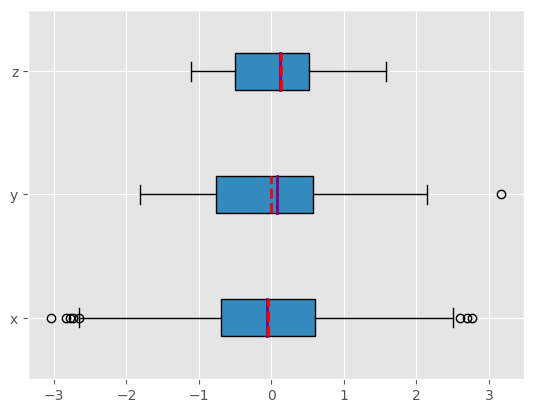

In [106]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})

The parameters of .boxplot() define the following:

  * x is your data.
  * vert sets the plot orientation to horizontal when False. The default orientation is vertical.
  * showmeans shows the mean of your data when True.
  * meanline represents the mean as a line when True. The default representation is a point.
  * labels: the labels of your data.
  * patch_artist determines how to draw the graph.
  * medianprops denotes the properties of the line representing the median.
  * meanprops indicates the properties of the line or dot representing the mean.

There are other parameters, but their analysis is beyond the scope of this tutorial.

The code above produces an image like this:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-09.bbe925f1a3e3.png', width=75% />
<div>

You can see three box plots. Each of them corresponds to a single dataset (x, y, or z) and show the following:

  * The mean is the red dashed line.
  * The median is the purple line.
  * The first quartile is the left edge of the blue rectangle.
  * The third quartile is the right edge of the blue rectangle.
  * The interquartile range is the length of the blue rectangle.
  * The range contains everything from left to right.
  * The outliers are the dots to the left and right.

A box plot can show so much information in a single figure!

### <a id='hist'>Histograms</a>

Histograms are particularly useful when there are a large number of unique values in a dataset. The histogram divides the values from a sorted dataset into intervals, also called bins. Often, all bins are of equal width, though this doesn’t have to be the case. The values of the lower and upper bounds of a bin are called the bin edges.

The frequency is a single value that corresponds to each bin. It’s the number of elements of the dataset with the values between the edges of the bin. By convention, all bins but the rightmost one are half-open. They include the values equal to the lower bounds, but exclude the values equal to the upper bounds. The rightmost bin is closed because it includes both bounds. If you divide a dataset with the bin edges 0, 5, 10, and 15, then there are three bins:

  * The first and leftmost bin contains the values greater than or equal to 0 and less than 5.
  * The second bin contains the values greater than or equal to 5 and less than 10.
  * The third and rightmost bin contains the values greater than or equal to 10 and less than or equal to 15.

The function np.histogram() is a convenient way to get data for histograms:

In [107]:
hist, bin_edges = np.histogram(x, bins=10)
print(hist)
print(bin_edges)

[  9  20  70 146 217 239 160  86  38  15]
[-3.04614305 -2.46559324 -1.88504342 -1.3044936  -0.72394379 -0.14339397
  0.43715585  1.01770566  1.59825548  2.1788053   2.75935511]


It takes the array with your data and the number (or edges) of bins and returns two NumPy arrays:

  * hist contains the frequency or the number of items corresponding to each bin.
  * bin_edges contains the edges or bounds of the bin.

What histogram() calculates, .hist() can show graphically:


Text(0, 0.5, 'Frequency')

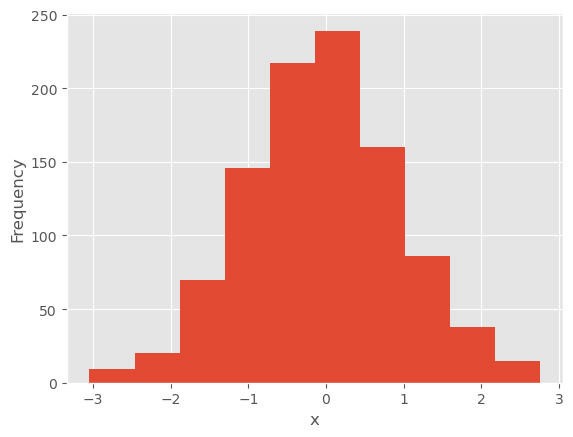

In [108]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')

The first argument of .hist() is the sequence with your data. The second argument defines the edges of the bins. The third disables the option to create a histogram with cumulative values. The code above produces a figure like this:

<div>
    <img src = 'https://files.realpython.com/media/py-stats-10.47c60c3e5c75.png', width=75% />
</div>

You can see the bin edges on the horizontal axis and the frequencies on the vertical axis.

It’s possible to get the histogram with the cumulative numbers of items if you provide the argument cumulative=True to .hist():

Text(0, 0.5, 'Frequency')

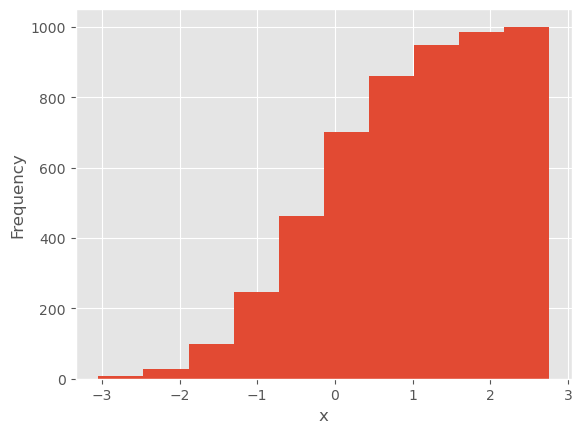

In [109]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')

It shows the histogram with the cumulative values. The frequency of the first and leftmost bin is the number of items in this bin. The frequency of the second bin is the sum of the numbers of items in the first and second bins. The other bins follow this same pattern. Finally, the frequency of the last and rightmost bin is the total number of items in the dataset (in this case, 1000). You can also directly draw a histogram with pd.Series.hist() using matplotlib in the background.

[back to top](#toc)

### <a id='pc'>Pie Charts</a>

Pie charts represent data with a small number of labels and given relative frequencies. They work well even with the labels that can’t be ordered (like nominal data). A pie chart is a circle divided into multiple slices. Each slice corresponds to a single distinct label from the dataset and has an area proportional to the relative frequency associated with that label.

Let’s define data associated to three labels:

In [110]:
x, y, z = 128, 256, 1024

Now, create a pie chart with .pie():

([<matplotlib.patches.Wedge at 0x153b6f950>,
 [Text(1.0554422683381766, 0.30990582150899426, 'x'),
  Text(0.4569564802357173, 1.000595210447554, 'y'),
  Text(-0.7203467082780743, -0.8313246176271596, 'z')],
 [Text(0.5756957827299144, 0.16903953900490593, '9.1%'),
  Text(0.24924898921948213, 0.5457792056986657, '18.2%'),
  Text(-0.39291638633349507, -0.4534497914329961, '72.7%')])

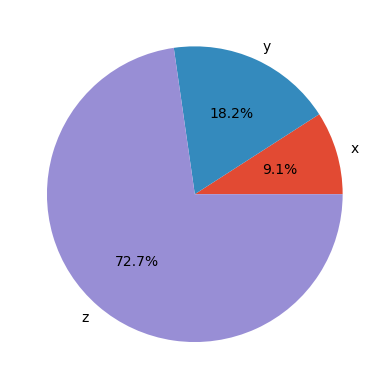

In [111]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')

The first argument of .pie() is your data, and the second is the sequence of the corresponding labels. autopct defines the format of the relative frequencies shown on the figure.

The pie chart shows x as the smallest part of the circle, y as the next largest, and then z as the largest part. The percentages denote the relative size of each value compared to their sum.

[back to top](#toc)

### <a id='bc'>Bar Charts</a>

Bar charts also illustrate data that correspond to given labels or discrete numeric values. They can show the pairs of data from two datasets. Items of one set are the labels, while the corresponding items of the other are their frequencies. Optionally, they can show the errors related to the frequencies, as well.

The bar chart shows parallel rectangles called bars. Each bar corresponds to a single label and has a height proportional to the frequency or relative frequency of its label. Let’s generate three datasets, each with 21 items:


In [112]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.abs(np.random.randn(21))

You use np.arange() to get x, or the array of consecutive integers from 0 to 20. You’ll use this to represent the labels. y is an array of uniformly distributed random integers, also between 0 and 20. This array will represent the frequencies. err contains normally distributed floating-point numbers, which are the errors. These values are optional.

You can create a bar chart with .bar() if you want vertical bars or .barh() if you’d like horizontal bars:

Text(0, 0.5, 'y')

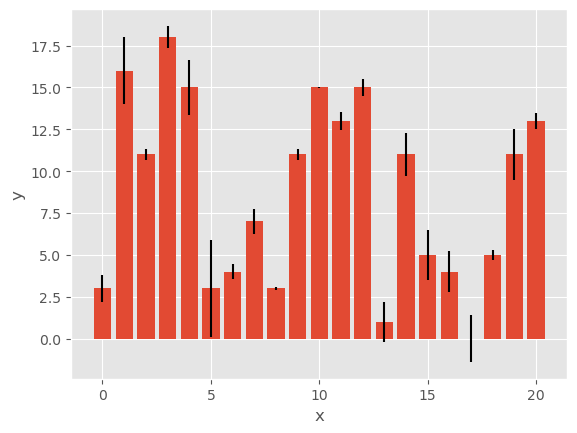

In [113]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')

The heights of the red bars correspond to the frequencies y, while the lengths of the black lines show the errors err. If you don’t want to include the errors, then omit the parameter yerr of .bar().

[back to top](#toc)

### <a id='xyp'>X-Y Plots</a>

The x-y plot or scatter plot represents the pairs of data from two datasets. The horizontal x-axis shows the values from the set x, while the vertical y-axis shows the corresponding values from the set y. You can optionally include the regression line and the correlation coefficient. Let’s generate two datasets and perform linear regression with scipy.stats.linregress():

In [114]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

The dataset x is again the array with the integers from 0 to 20. y is calculated as a linear function of x distorted with some random noise.

linregress returns several values. You’ll need the slope and intercept of the regression line, as well as the correlation coefficient r. Then you can apply .plot() to get the x-y plot:

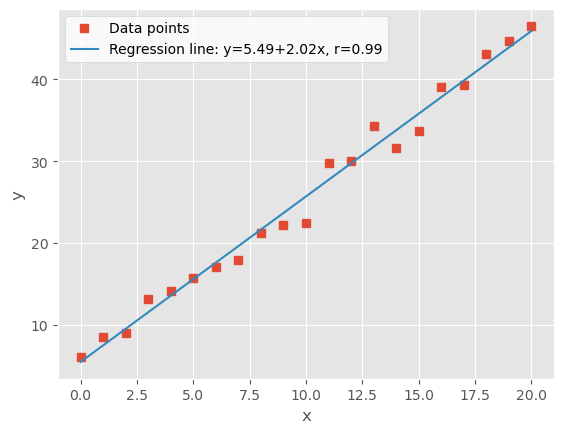

In [115]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')

You can see the data points (x-y pairs) as red squares, as well as the blue regression line.

[back to top](#toc)

### <a id='heat'>Heatmaps</a>

A heatmap can be used to visually show a matrix. The colors represent the numbers or elements of the matrix. Heatmaps are particularly useful for illustrating the covariance and correlation matrices. You can create the heatmap for a covariance matrix with .imshow():


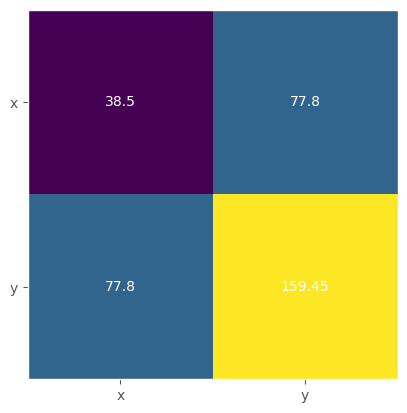

In [116]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')

Here, the heatmap contains the labels 'x' and 'y' as well as the numbers from the covariance matrix. The yellow field represents the largest element from the matrix 130.34, while the purple one corresponds to the smallest element 38.5. The blue squares in between are associated with the value 69.9.

You can obtain the heatmap for the correlation coefficient matrix following the same logic:

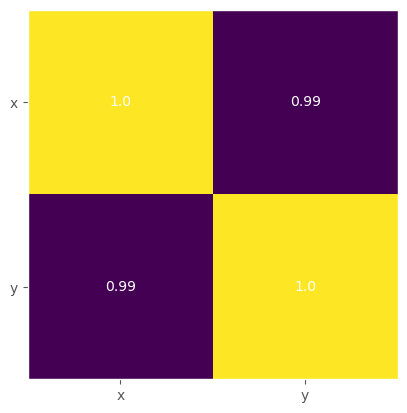

In [117]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')

The yellow color represents the value 1.0, and the purple color shows 0.99.

[back to top](#toc)

## Conclusion
<a id='conclusion'></a>

You now know the quantities that describe and summarize datasets and how to calculate them in Python. It’s possible to get descriptive statistics with pure Python code, but that’s rarely necessary. Usually, you’ll use some of the libraries created especially for this purpose:

  * Use Python’s statistics for the most important Python statistics functions.
  * Use NumPy to handle arrays efficiently.
  * Use SciPy for additional Python statistics routines for NumPy arrays.
  * Use pandas to work with labeled datasets.
  * Use Matplotlib to visualize data with plots, charts, and histograms.

In the era of big data and artificial intelligence, you must know how to calculate descriptive statistics measures. Now you’re ready to dive deeper into the world of data science and machine learning! If you have questions or comments, then please put them in the comments section below.

[back to top](#toc)

# Linear Regression
----
Jim Potemra

March 2025

----

## Motivation

Often in science and engineering coursework, we are asked to determine the state of a system given the parameters of the system. For example, the relationship between the force exerted by a linear spring, *F*, and the displacement of the spring from its natural length, *x*, is usually represented by the model 

$$
\begin{align}
F = kx
\end{align}
$$

where *k* is the spring stiffness. We are then asked to compute the force for a given *k* and *x* value. 

However in practice, the stiffness and in general, most of the parameters of a system, are not known a *priori*. Instead, we are usually presented with data points about how the system has behaved in the past. For
our spring example, we may be given $(x, F)$ data pairs that have been previously recorded from an experiment. Ideally, all these data points would lie exactly on a line going through the origin (since there is no force at zero displacement). We could then measure the slope of this line and get our stiffness value for *k*. However,
practical data usually has some measurement noise because of sensor inaccuracy, measurement error, or a variety of other reasons. The following figure shows an example of what data might look like for a simple spring experiment. 

<img src="./spring_data.jpg" alt="spring experiment" title="Results from force-displacement experiment for spring (fictional). The theoretical linear relationship between force and displacement in a linear spring is F = kx . What do you think k should be given as the experimental data?" width="500"/>

This notebook teaches methods of finding the "most likely" model parameters given a set of data, _e.g._, how to find the spring stiffness in our mock experiment. By the end of this chapter you should understand how these methods choose model parameters, the importance of choosing the correct model, and how to implement these methods in.

---

In statistics, linear regression is a model that estimates the linear relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable). A model with exactly one explanatory variable is a simple linear regression; a model with two or more explanatory variables is a multiple linear regression. This term is distinct from multivariate linear regression, which predicts multiple correlated dependent variables rather than a single dependent variable.

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

Linear regression is also a type of machine learning algorithm, more specifically a supervised algorithm, that learns from the labelled datasets and maps the data points to the most optimized linear functions that can be used for prediction on new datasets.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications.  This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.

Linear regression has many practical uses. Most applications fall into one of the following two broad categories:

  * If the goal is error i.e. variance reduction in prediction or forecasting, linear regression can be used to fit a predictive model to an observed data set of values of the response and explanatory variables. After developing such a model, if additional values of the explanatory variables are collected without an accompanying response value, the fitted model can be used to make a prediction of the response.
  * If the goal is to explain variation in the response variable that can be attributed to variation in the explanatory variables, linear regression analysis can be applied to quantify the strength of the relationship between the response and the explanatory variables, and in particular to determine whether some explanatory variables may have no linear relationship with the response at all, or to identify which subsets of explanatory variables may contain redundant information about the response.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). Use of the Mean Squared Error (MSE) as the cost on a dataset that has many large outliers, can result in a model that fits the outliers more than the true data due to the higher importance assigned by MSE to large errors. So, cost functions that are robust to outliers should be used if the dataset has many large outliers. Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous. 

## Least Squares Regression Problem Statement

Given a set of independent data points $x_i$ and dependent data points $y_i, i = 1, \ldots, m$, we would like to find an **estimation function**, $\hat{y}(x)$, that describes the data as well as possible. Note that $\hat{y}$ can be a function of several variables, but for the sake of this discussion, we restrict the domain of $\hat{y}$ to be a single variable. In least squares regression, the estimation function must be a linear combination of **basis functions**, $f_i(x)$. That is, the estimation function must be of the form
$$
\hat{y}(x) = \sum_{i = 1}^n {\alpha}_i f_i(x)
$$
The scalars ${\alpha}_i$ are referred to as the **parameters** of the estimation function, and each basis function must be linearly independent from the others. In other words, in the proper "functional space" no basis function should be expressible as a linear combination of the other functions. Note: In general, there are significantly more data points, $m$, than basis functions, $n$ (i.e., $m >> n$).

**TRY IT!** 
Create an estimation function for the force-displacement relationship of a linear spring. Identify the basis function(s) and model parameters. 

The relationship between the force, $F$, and the displacement, $x$, can be described by the function $F(x) = kx$ where $k$ is the spring stiffness. The only basis function is the function $f_1(x) = x$ and the model parameter to find is ${\alpha}_1 = k$.

The goal of **least squares regression** is to find the parameters of the estimation function that minimize the **total squared error**, $E$, defined by $E = \sum_{i=1}^m (\hat{y} - y_i)^2$. The **individual errors** or **residuals** are defined as $e_i = (\hat{y} - y_i)$. If $e$ is the vector containing all the individual errors, then we are also trying to minimize $E = \|{e}\|_{2}^{2}$, which is the $L_2$ norm defined in the previous chapter.

In the next two sections we derive the least squares method of finding the desired parameters. The first derivation comes from linear algebra, and the second derivation comes from multivariable calculus. Although they are different derivations, they lead to the same least squares formula. You are free to focus on the section with which you are most comfortable.

## Least Squares Regression Derivation (Linear Algebra)

First, we enumerate the estimation of the data at each data point $x_i$

\begin{eqnarray*}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1), \\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2), \\
&&\qquad\qquad \qquad \qquad \quad \cdots\\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).\end{eqnarray*}

Let $X\in {\Bbb R}^n$ be a column vector such that the $i$-th element of $X$ contains the value of the $i$-th $x$-data point, $x_i, \hat{Y}$ be a column vector with elements, $\hat{Y}_i = \hat{y}(x_i), {\beta}$ be a column vector such that ${\beta}_i = {\alpha}_i, F_i(x)$ be a function that returns a column vector of $f_i(x)$ computed on every element of $x$, and $A$ be an $m \times n$ matrix such that the $i$-th column of $A$ is $F_i(x)$. Given this notation, the previous system of equations becomes $\hat{Y} = A{\beta}$.

Now if $Y$ is a column vector such that $Y_i = y_i$, the total squared error is given by $E = \|{\hat{Y} - Y}\|_{2}^2$. You can verify this by substituting the definition of the $L_2$ norm. Since we want to make $E$ as small as possible and norms are a measure of distance, this previous expression is equivalent to saying that we want $\hat{Y}$ and $Y$ to be a "close as possible." Note that in general $Y$ will not be in the range of $A$ and therefore $E > 0$.

Consider the following simplified depiction of the range of $A$; see the following figure. Note this is $\it not$ a plot of the data points $(x_i, y_i)$.

<img src="./Illustration_of_Least_Square_Regression.png" alt="Illustration of Least Square Regression" title="Illustration of the L2 projection of Y on the range of A" width="400"/>

From observation, the vector in the range of $A, \hat{Y}$, that is closest to $Y$ is the one that can point perpendicularly to $Y$. Therefore, we want a vector $Y - \hat{Y}$ that is perpendicular to the vector $\hat{Y}$.

Recall from Linear Algebra that two vectors are perpendicular, or orthogonal, if their dot product is 0. Noting that the dot product between two vectors, $v$ and $w$, can be written as ${\text{dot}}(v,w) = v^T w$, we can state that $\hat{Y}$ and $Y - \hat{Y}$ are perpendicular if ${\text{dot}}(\hat{Y}, Y - \hat{Y}) = 0$; therefore, $\hat{Y}^T (Y - \hat{Y}) = 0$, which is equivalent to $(A{\beta})^T(Y - A{\beta}) = 0$.

Noting that for two matrices $A$ and $B, (AB)^T = B^T A^T$ and using distributive properties of vector multiplication, this is equivalent to ${\beta}^T A^T Y - {\beta}^T A^T A {\beta} = {\beta}^T(A^T Y - A^T A {\beta}) = 0$. The solution, ${\beta} = \textbf{0}$, is a trivial solution, so we use $A^T Y - A^T A {\beta} = 0$ to find a more interesting solution. Solving this equation for ${\beta}$ gives the $\textbf{least squares regression formula}$:

$$
{\beta} = (A^T A)^{-1} A^T Y
$$

Note that $(A^T A)^{-1}A^T$ is called the **pseudo-inverse** of $A$ and exists when $m > n$ and $A$ has linearly independent columns. Proving the invertibility of $(A^T A)$ is outside the scope of this book, but it is always invertible except for some pathological cases.

## Simple example

In [118]:
# import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_62068/1425642333.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [119]:
# create some fake data (note these are lists)
x = [5, 15, 25, 35, 45, 55]
y = [5, 20, 14, 32, 22, 38]

# convert to numpy arrays
xa = np.array(x)
ya = np.array(y)

In [120]:
# turn y into a column vector
ya = ya[:, np.newaxis]

# assemble matrix A
A = np.vstack([xa, np.ones(len(x))]).T

### compute directly using linear algebra

In [121]:
ATA = np.dot(A.T,A)
ATAi = np.linalg.inv(ATA)
ATy = np.dot(A.T,y)
alpha = np.dot(ATAi,ATy)
print(alpha)

[0.54       5.63333333]


In [122]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[0.54       5.63333333]


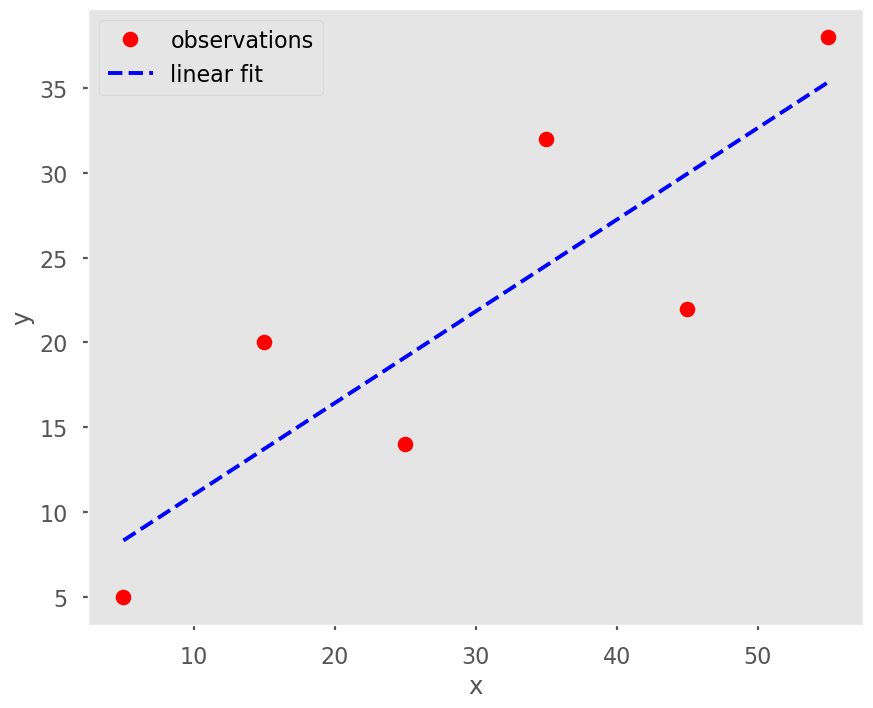

In [123]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(xa, ya, color='red', marker='o', linestyle='none', label='observations')
plt.plot(xa, alpha[0]*xa + alpha[1], color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### repeat using the numpy "polyfit" method

0.54 5.633333333333347


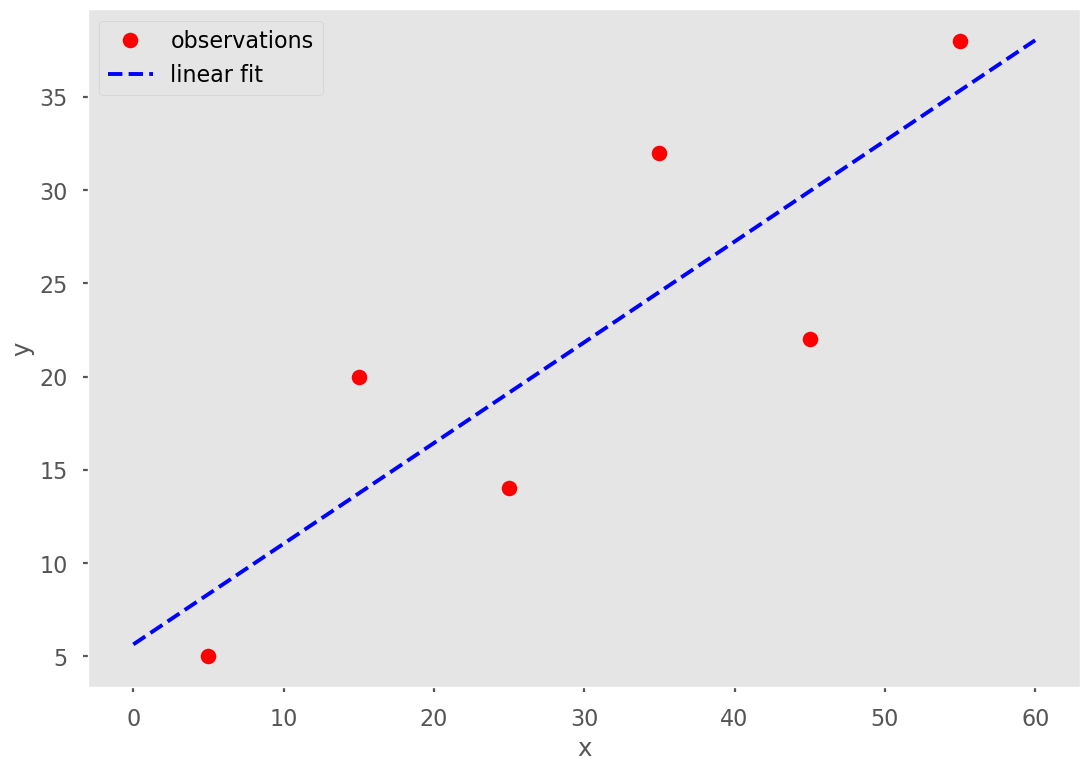

In [124]:
#slope, intercept = np.polyfit(a, b, deg=3)
m, b = np.polyfit(x, y, deg=1)
print(m,b)
x1 = np.linspace(0,60,60)
#y1 = x1 * slope + intercept
y1 = m*x1+b
plt.plot(x, y, color='red', marker='o', linestyle='none', label='observations')
plt.plot(x1, y1, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

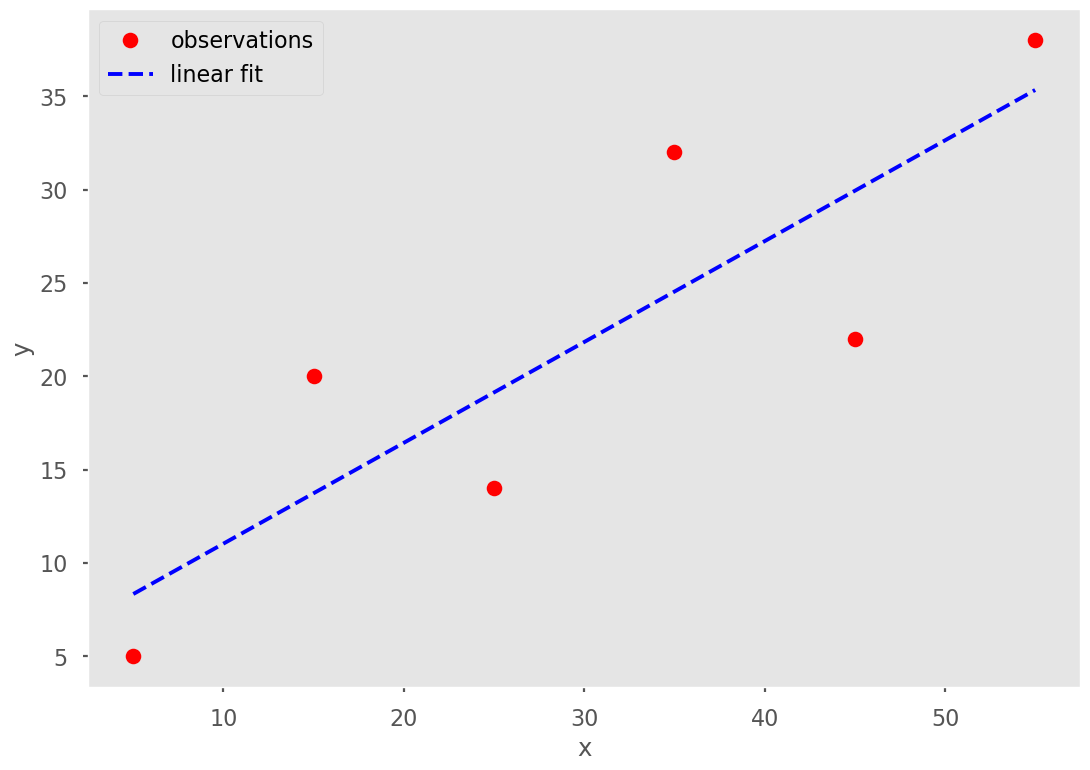

In [125]:
trend = np.polyval([m,b],x)
plt.plot(x, y, color='red', marker='o', linestyle='none', label='observations')
plt.plot(x, trend, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

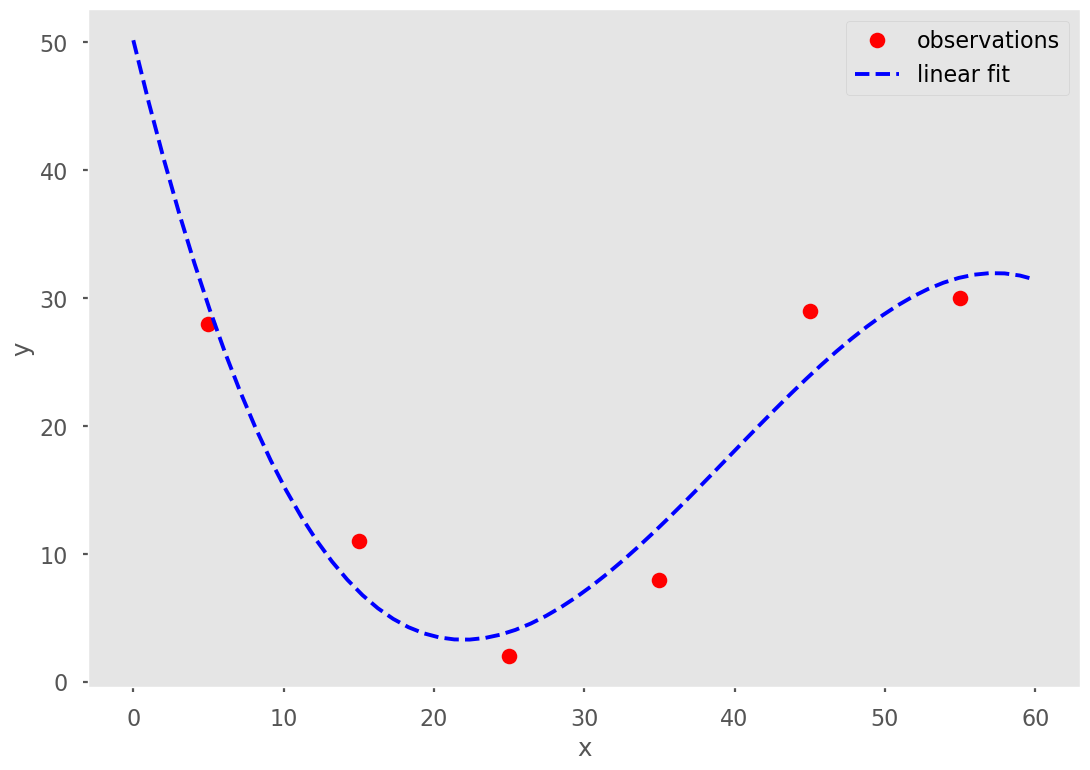

In [126]:
a = [5, 15, 25, 35, 45, 55]
b = [28, 11, 2, 8, 29, 30]
#slope, intercept = np.polyfit(a, b, deg=3)
coefs = np.polyfit(a, b, deg=3)

x = np.linspace(0,60,60)
y = coefs[3]+coefs[2]*x1+coefs[1]*x*x+coefs[0]*x*x*x

plt.plot(a, b, color='red', marker='o', linestyle='none', label='observations')
plt.plot(x, y, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### Use the pseudoinverse

We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, therefore, we could use the *pinv* function in *numpy* to directly calculate it. 

[ 0.2 12. ]


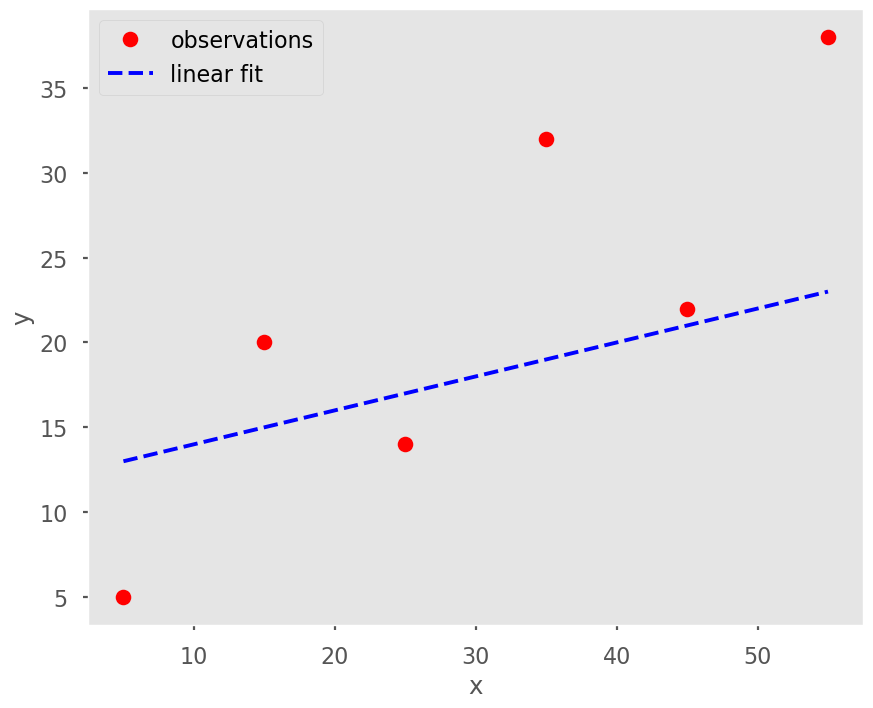

In [127]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(b)
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(xa, ya, color='red', marker='o', linestyle='none', label='observations')
plt.plot(xa, alpha[0]*xa + alpha[1], color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### use numpy least squares linear algorithm 

In [128]:
m, b = np.linalg.lstsq(A,ya,rcond=None)[0]

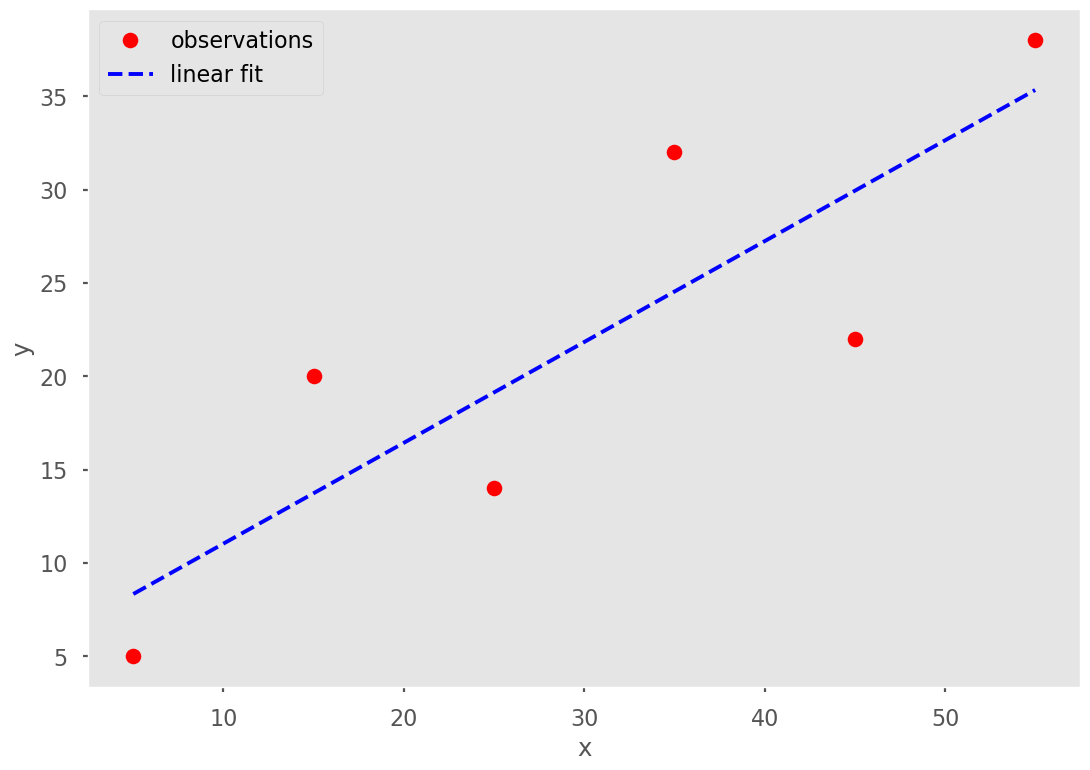

In [129]:
plt.plot(a, ya, color='red',marker='o', linestyle='none', label='observations')
plt.plot(xa, m*xa+b, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

In [130]:
from scipy import stats
from scipy.optimize import curve_fit

### Use optimize.curve_fit from scipy

This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don't need to turn y into a column vector. 

In [131]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [132]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.5263533  1.00197193]


In [133]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [134]:
from sklearn.linear_model import LinearRegression

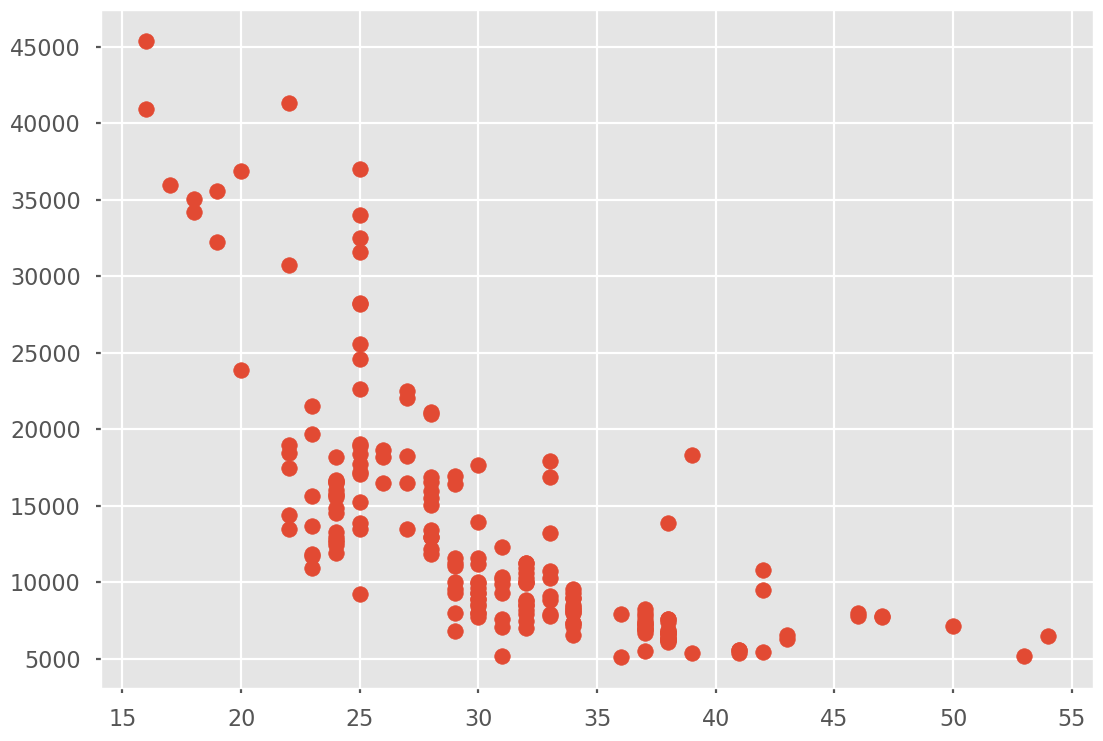

In [135]:
X = df['highway-mpg']
Y = df['price']
plt.scatter(X,Y)

In [136]:
X2 = X.values.reshape(-1, 1)
Y2 = Y.values.reshape(-1, 1)
LinearRegression().fit(X2,Y2)

LinearRegression()

In [137]:
import seaborn as sns

(0.0, 48171.15500230595)

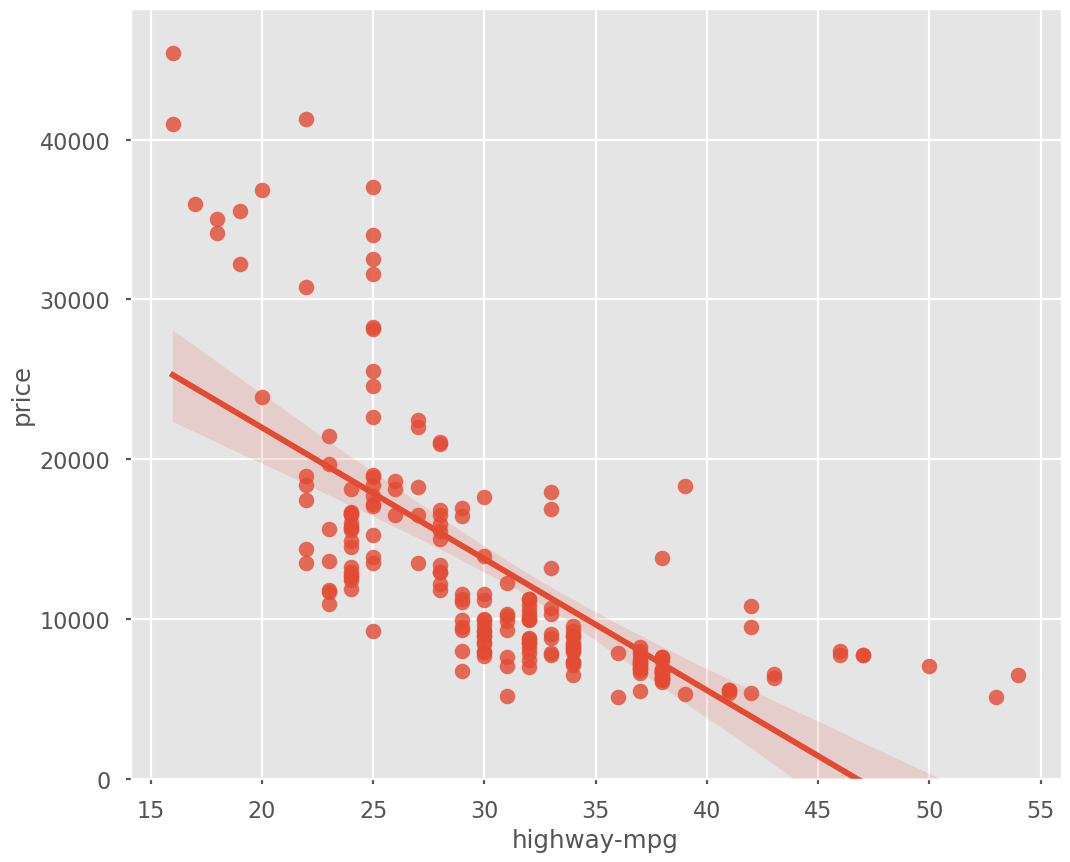

In [138]:
plt.figure(figsize=(12,10))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

# NumPy, SciPy, and pandas: Correlation With Python
Mirko Stojiljković <br>
_April 2024_ <br>
Taken from https://realpython.com/numpy-scipy-pandas-correlation-python/

---

## Table of Contents
 * Correlation
   * Example: NumPy Correlation Calculation
   * Example: SciPy Correlation Calculation
   * Example: pandas Correlation Calculation
 * Linear Correlation
   * Pearson Correlation Coefficient
   * Linear Regression: SciPy Implementation
   * Pearson Correlation: NumPy and SciPy Implementation
   * Pearson Correlation: pandas Implementation
 * Rank Correlation
   * Spearman Correlation Coefficient
   * Kendall Correlation Coefficient
   * Rank: SciPy Implementation
   * Rank Correlation: NumPy and SciPy Implementation
   * Rank Correlation: pandas Implementation
 * Visualization of Correlation
   * X-Y Plots With a Regression Line
   * Heatmaps of Correlation Matrices
 * Conclusion

Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of high importance for science and technology, and Python has great tools that you can use to calculate them. SciPy, NumPy, and pandas correlation methods are fast, comprehensive, and well-documented.

In this tutorial, you’ll learn:

  * What Pearson, Spearman, and Kendall correlation coefficients are
  * How to use SciPy, NumPy, and pandas correlation functions
  * How to visualize data, regression lines, and correlation matrices with Matplotlib

You’ll start with an explanation of correlation, then see three quick introductory examples, and finally dive into details of NumPy, SciPy and pandas correlation.

Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.

Every dataset you work with uses variables and observations. For example, you might be interested in understanding the following:

  * How the height of basketball players is correlated to their shooting accuracy
  * Whether there’s a relationship between employee work experience and salary
  * What mathematical dependence exists between the population density and the gross domestic product of different countries

In the examples above, the height, shooting accuracy, years of experience, salary, population density, and gross domestic product are the features or variables. The data related to each player, employee, and each country are the observations.

When data is represented in the form of a table, the rows of that table are usually the observations, while the columns are the features. Take a look at this employee table:
    
| Name | Years of Experience | Annual Salary |
|------|---------------------|---------------|
| Ann  |	30 	             | 120,000       |
| Rob  |	21 	             | 105,000       |
| Tom  |	19 	             | 90,000        |
| Ivy  |	10 	             | 82,000        |

In this table, each row represents one observation, or the data about one employee (either Ann, Rob, Tom, or Ivy). Each column shows one property or feature (name, experience, or salary) for all the employees.

If you analyze any two features of a dataset, then you’ll find some type of correlation between those two features. Consider the following figures:

<div>
<img src = 'https://files.realpython.com/media/py-corr-1.d13ed60a9b91.png', width=75% />
</div>

Each of these plots shows one of three different forms of correlation:

Negative correlation (red dots): In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

Weak or no correlation (green dots): The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

Positive correlation (blue dots): In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.

The next figure represents the data from the employee table above:

<div>
<img src = 'https://files.realpython.com/media/py-corr-6.dfed6cf1da64.png', width=50% />
</div>

The correlation between experience and salary is positive because higher experience corresponds to a larger salary and vice versa.

Note: When you’re analyzing correlation, you should always have in mind that correlation does not indicate causation. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

Correlation is tightly connected to other statistical quantities like the mean, standard deviation, variance, and covariance. If you want to learn more about these quantities and how to calculate them with Python, then check out Descriptive Statistics with Python.

There are several statistics that you can use to quantify correlation. In this tutorial, you’ll learn about three correlation coefficients:

  * Pearson’s r
  * Spearman’s rho
  * Kendall’s tau

Pearson’s coefficient measures linear correlation, while the Spearman and Kendall coefficients compare the ranks of data. There are several NumPy, SciPy, and pandas correlation functions and methods that you can use to calculate these coefficients. You can also use Matplotlib to conveniently illustrate the results.

## Example: NumPy Correlation Calculation

NumPy has many statistics routines, including np.corrcoef(), that return a matrix of Pearson correlation coefficients. You can start by importing NumPy and defining two NumPy arrays. These are instances of the class ndarray. Call them x and y:


In [139]:
import numpy as np

# use np.arange() to create an array x of integers 
# between 10 (inclusive) and 20 (exclusive)
x = np.arange(10, 20)
print('x is', type(x), 'with values', x)

# use np.array() to create a second array y containing 
# arbitrary integers.
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print('y is', type(y), 'with values', y)

# call np.corrcoef() with both arrays as arguments:
r = np.corrcoef(x, y)
print('r is', type(r), 'with values', r)

x is <class 'numpy.ndarray'> with values [10 11 12 13 14 15 16 17 18 19]
y is <class 'numpy.ndarray'> with values [ 2  1  4  5  8 12 18 25 96 48]
r is <class 'numpy.ndarray'> with values [[1.         0.75864029]
 [0.75864029 1.        ]]


corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients. Here’s a simplified version of the correlation matrix you just created:

             x       y
     x    1.00    0.76
     y    0.76    1.00

The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.76.

This figure shows the data points and the correlation coefficients for the above example:

<div>
<img src = 'https://files.realpython.com/media/py-corr-5.2ee03a029ffe.png', width=50% />
</div>

The red squares are the data points. As you can see, the figure also shows the values of the three correlation coefficients.

## Example: SciPy Correlation Calculation

SciPy also has many statistics routines contained in scipy.stats. You can use the following methods to calculate the three correlation coefficients you saw earlier:

  * pearsonr()
  * spearmanr()
  * kendalltau()

In [140]:
import numpy as np
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

# Pearson's r
r, p = scipy.stats.pearsonr(x, y)
print('Pearson\'s r correlation:',r)
print('Pearson\'s r p-value:',p)

# Spearman's rho
r, p = scipy.stats.spearmanr(x, y)
print('Spearman\'s rho correlation:',r)
print('Spearman\'s rho p-value:',p)
      
# Kendall's tau
r, p = scipy.stats.kendalltau(x, y)
print('Kendall\'s tau correlation:',r)
print('Kendall\'s tau p-value:',p)

Pearson's r correlation: 0.758640289091187
Pearson's r p-value: 0.010964341301680815
Spearman's rho correlation: 0.9757575757575757
Spearman's rho p-value: 1.4675461874042197e-06
Kendall's tau correlation: 0.911111111111111
Kendall's tau p-value: 2.9761904761904762e-05


Note that these functions return objects that contain two values:

  * The correlation coefficient
  * The p-value

You use the p-value in statistical methods when you’re testing a hypothesis. The p-value is an important measure that requires in-depth knowledge of probability and statistics to interpret. To learn more about them, you can read about the basics or check out a data scientist’s explanation of p-values.

You can also extract the p-values and the correlation coefficients with their indices, or methods:

In [141]:
scipy.stats.pearsonr(x, y)[0]    # Pearson's r
scipy.stats.spearmanr(x, y)[0]   # Spearman's rho
scipy.stats.kendalltau(x, y)[0]  # Kendall's tau

scipy.stats.spearmanr(x, y).correlation   # Spearman's rho
scipy.stats.kendalltau(x, y).correlation  # Kendall's tau

0.911111111111111

## Example: pandas Correlation Calculation

pandas is, in some cases, more convenient than NumPy and SciPy for calculating statistics. It offers statistical methods for Series and DataFrame instances. For example, given two Series objects with the same number of items, you can call .corr() on one of them with the other as the first argument:


In [142]:
import pandas as pd
x = pd.Series(range(10, 20))
print('x is', type(x), 'with values', x)
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print('y is', type(y), 'with values', y)

x is <class 'pandas.core.series.Series'> with values 0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
y is <class 'pandas.core.series.Series'> with values 0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64


In [143]:
# default is Pearson's r
x.corr(y)
y.corr(x)

# other methods
x.corr(y, method='spearman')
x.corr(y, method='kendall')

0.911111111111111

Here, you use .corr() to calculate all three correlation coefficients. You define the desired statistic with the parameter method, which can take on one of several values:

  * 'pearson'
  * 'spearman'
  * 'kendall'
  * a callable

The callable can be any function, method, or object with .__call__() that accepts two one-dimensional arrays and returns a floating-point number.

### Linear Correlation

Linear correlation measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
Pearson Correlation Coefficient

Consider a dataset with two features: x and y. Each feature has n values, so x and y are n-tuples. Say that the first value x₁ from x corresponds to the first value y₁ from y, the second value x₂ from x to the second value y₂ from y, and so on. Then, there are n pairs of corresponding values: (x₁, y₁), (x₂, y₂), and so on. Each of these x-y pairs represents a single observation.

The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:

\begin{eqnarray}
   r = \frac{\sum_{i} ( x_{i} − \bar{x})(  y_{i} - \bar{y} )}{(\sqrt{\sum_{i}(x_{i}-\bar{x})^2})(\sqrt{\sum_{i}(y_{i}-\bar{y})^2}}
\end{eqnarray}

Here, $i$ takes on the values 1, 2, …, n. The mean values of x and y are denoted with $\bar{x}$ and $\bar{y}$. This formula shows that if larger x values tend to correspond to larger y values and vice versa, then r is positive. On the other hand, if larger x values are mostly associated with smaller y values and vice versa, then r is negative.

Here are some important facts about the Pearson correlation coefficient:

  * The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.
  * The maximum value r = 1 corresponds to the case in which there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.
  * The value r > 0 indicates positive correlation between x and y.
  * The value r = 0 corresponds to the case in which there’s no linear relationship between x and y.
  * The value r < 0 indicates negative correlation between x and y.
  * The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

The above facts can be summed up in the following table:

| Pearson’s r Value 	| Correlation Between x and y         |
|-----------------------|-------------------------------------|
| equal to 1 	        | perfect positive linear relationship|
| greater than 0 	    | positive correlation                |
| equal to 0 	        | no linear relationship              |
| less than 0 	        | negative correlation                |
| equal to -1 	        | perfect negative linear relationship|

In short, a larger absolute value of r indicates stronger correlation, closer to a linear function. A smaller absolute value of r indicates weaker correlation.

## Linear Regression: SciPy Implementation

Linear regression is the process of finding the linear function that is as close as possible to the actual relationship between features. In other words, you determine the linear function that best describes the association between the features. This linear function is also called the regression line.

You can implement linear regression with SciPy. You’ll get the linear function that best approximates the relationship between two arrays, as well as the Pearson correlation coefficient. To get started, you first need to import the libraries and prepare some data to work with:

In [144]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [145]:
# use scipy.stats.linregress() to perform linear regression for 
# two arrays of the same length. You should provide the arrays 
# as the arguments and get the outputs by using dot notation:

result = scipy.stats.linregress(x, y)
print('Slope:', result.slope)
print('Intercept:', result.intercept)
print('Correlation coefficient:', result.rvalue)
print('P-value:', result.pvalue)
print('Standard deviation:',result.stderr)

Slope: 7.4363636363636365
Intercept: -85.92727272727274
Correlation coefficient: 0.7586402890911869
P-value: 0.010964341301680825
Standard deviation: 2.257878767543913


In [146]:
# can also provide a single argument to linregress(), but it must be a 
# two-dimensional array with one dimension of length two:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])
scipy.stats.linregress(xy)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913, intercept_stderr=33.37538930964323)

Note: In the example above, scipy.stats.linregress() considers the rows as features and columns as observations. That’s because there are two rows.

The usual practice in machine learning is the opposite: rows are observations and columns are features. Many machine learning libraries, like pandas, Scikit-Learn, Keras, and others, follow this convention.

You should be careful to note how the observations and features are indicated whenever you’re analyzing correlation in a dataset.

linregress() will return the same result if you provide the transpose of xy, or a NumPy array with 10 rows and two columns. In NumPy, you can transpose a matrix in many ways:

    transpose()
    .transpose()
    .T

In [147]:
xy.T

array([[10,  2],
       [11,  1],
       [12,  4],
       [13,  5],
       [14,  8],
       [15, 12],
       [16, 18],
       [17, 25],
       [18, 96],
       [19, 48]])

In [148]:
scipy.stats.linregress(xy.T)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913, intercept_stderr=33.37538930964323)

Here, you use .T to get the transpose of xy. linregress() works the same way with xy and its transpose. It extracts the features by splitting the array along the dimension with length two.

You should also be careful to note whether or not your dataset contains missing values. In data science and machine learning, you’ll often find some missing or corrupted data. The usual way to represent it in Python, NumPy, SciPy, and pandas is by using NaN or Not a Number values. But if your data contains nan values, then you won’t get a useful result with linregress():

In [149]:
scipy.stats.linregress(np.arange(3), np.array([2, np.nan, 5]))

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In this case, your resulting object returns all nan values. In Python, nan is a special floating-point value that you can get by using any of the following:

    float('nan')
    math.nan
    numpy.nan

You can also check whether a variable corresponds to nan with math.isnan() or numpy.isnan().

## Pearson Correlation: NumPy and SciPy Implementation

You’ve already seen how to get the Pearson correlation coefficient with corrcoef() and pearsonr():

In [150]:
r, p = scipy.stats.pearsonr(x, y)
print(r)
print(p)

np.corrcoef(x, y)

0.758640289091187
0.010964341301680815


array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

Note that if you provide an array with a nan value to pearsonr(), you’ll get a ValueError.

There are few additional details worth considering. First, recall that np.corrcoef() can take two NumPy arrays as arguments. Instead, you can pass a single two-dimensional array with the same values as the argument.  If you want to get the correlation coefficients for three features, then you just provide a numeric two-dimensional array with three rows as the argument:

In [151]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

You’ll obtain the correlation matrix again, but this one will be larger than previous ones:
 
            x        y        z
    x     1.00     0.76    -0.97
    y     0.76     1.00    -0.83
    z    -0.97    -0.83     1.00

This is because corrcoef() considers each row of xyz as one feature. The value 0.76 is the correlation coefficient for the first two features of xyz. This is the same as the coefficient for x and y in previous examples. -0.97 represents Pearson’s r for the first and third features, while -0.83 is Pearson’s r for the last two features.

Here’s an interesting example of what happens when you pass nan data to corrcoef():

In [152]:
arr_with_nan = np.array([[0, 1, 2, 3],
                         [2, 4, 1, 8],
                         [2, 5, np.nan, 2]])
np.corrcoef(arr_with_nan)

array([[1.        , 0.62554324,        nan],
       [0.62554324, 1.        ,        nan],
       [       nan,        nan,        nan]])

In this example, the first two rows (or features) of arr_with_nan are okay, but the third row [2, 5, np.nan, 2] contains a nan value. Everything that doesn’t include the feature with nan is calculated well. The results that depend on the last row, however, are nan.

By default, numpy.corrcoef() considers the rows as features and the columns as observations. If you want the opposite behavior, which is widely used in machine learning, then use the argument rowvar=False:

In [153]:
xyz.T

array([[ 10,   2,   5],
       [ 11,   1,   3],
       [ 12,   4,   2],
       [ 13,   5,   1],
       [ 14,   8,   0],
       [ 15,  12,  -2],
       [ 16,  18,  -8],
       [ 17,  25, -11],
       [ 18,  96, -15],
       [ 19,  48, -16]])

In [154]:
np.corrcoef(xyz.T, rowvar=False)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

This array is identical to the one you saw earlier. Here, you apply a different convention, but the result is the same.
Pearson Correlation: pandas Implementation

So far, you’ve used Series and DataFrame object methods to calculate correlation coefficients. Let’s explore these methods in more detail. First, you need to import pandas and create some instances of Series and DataFrame:


In [155]:
import pandas as pd
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

You now have three Series objects called x, y, and z. You also have two DataFrame objects, xy and xyz.

Note: When you work with DataFrame instances, you should be aware that the rows are observations and the columns are features. This is consistent with the usual practice in machine learning.

You’ve already learned how to use .corr() with Series objects to get the Pearson correlation coefficient:
    
    xcorr(y)

Here, you call .corr() on one object and pass the other as the first argument.
If you provide a nan value, then .corr() will still work, but it will exclude observations that contain nan values:

In [156]:
u, u_with_nan = pd.Series([1, 2, 3]), pd.Series([1, 2, np.nan, 3])
v, w = pd.Series([1, 4, 8]), pd.Series([1, 4, 154, 8])
print(u.corr(v))
print(u_with_nan.corr(w))

0.9966158955401239
0.9966158955401239


You get the same value of the correlation coefficient in these two examples. That’s because .corr() ignores the pair of values (np.nan, 154) that has a missing value.

You can also use .corr() with DataFrame objects. You can use it to get the correlation matrix for their columns:

In [157]:
corr_matrix = xy.corr()
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [158]:
corr_matrix = xyz.corr()
corr_matrix

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


Another useful method is .corrwith(), which allows you to calculate the correlation coefficients between the rows or columns of one DataFrame object and another Series or DataFrame object passed as the first argument:


In [159]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

In this case, the result is a new Series object with the correlation coefficient for the column xy['x-values'] and the values of z, as well as the coefficient for xy['y-values'] and z.

.corrwith() has the optional parameter axis that specifies whether columns or rows represent the features. The default value of axis is 0, and it also defaults to columns representing features. There’s also a drop parameter, which indicates what to do with missing values.

Both .corr() and .corrwith() have the optional parameter method to specify the correlation coefficient that you want to calculate. The Pearson correlation coefficient is returned by default, so you don’t need to provide it in this case.

## Rank Correlation
Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features. If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned only with the order of values, not with the particular values from the dataset.

To illustrate the difference between linear and rank correlation, consider the following figure:

<div>
    <img src = 'https://files.realpython.com/media/py-corr-2.ac1acc7812d0.png', width=75% />
</div>

The left plot has a perfect positive linear relationship between x and y, so r = 1. The central plot shows positive correlation and the right one shows negative correlation. However, neither of them is a linear function, so r is different than −1 or 1.

When you look only at the orderings or ranks, all three relationships are perfect! The left and central plots show the observations where larger x values always correspond to larger y values. This is perfect positive rank correlation. The right plot illustrates the opposite case, which is perfect negative rank correlation.

## Spearman Correlation Coefficient

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

Say you have two n-tuples, x and y, where (x₁, y₁), (x₂, y₂), … are the observations as pairs of corresponding values. You can calculate the Spearman correlation coefficient ρ the same way as the Pearson coefficient. You’ll use the ranks instead of the actual values from x and y.

Here are some important facts about the Spearman correlation coefficient:

  * It can take a real value in the range −1 ≤ ρ ≤ 1.
  * Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.
  * Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.

You can calculate Spearman’s rho in Python in a very similar way as you would Pearson’s r.

## Kendall Correlation Coefficient

Let’s start again by considering two n-tuples, x and y. Each of the x-y pairs (x₁, y₁), (x₂, y₂), … is a single observation. A pair of observations (xᵢ, yᵢ) and (xⱼ, yⱼ), where i < j, will be one of three things:

    concordant if either (xᵢ > xⱼ and yᵢ > yⱼ) or (xᵢ < xⱼ and yᵢ < yⱼ)
    discordant if either (xᵢ < xⱼ and yᵢ > yⱼ) or (xᵢ > xⱼ and yᵢ < yⱼ)
    neither if there’s a tie in x (xᵢ = xⱼ) or a tie in y (yᵢ = yⱼ)
The Kendall correlation coefficient compares the number of concordant and discordant pairs of data. This coefficient is based on the difference in the counts of concordant and discordant pairs relative to the number of x-y pairs. It’s often denoted with the Greek letter tau (τ) and called Kendall’s tau.

According to the scipy.stats official docs, the Kendall correlation coefficient is calculated as 

\begin{eqnarray}
  \tau = \frac{n^{+} - n^{-}}{\sqrt{(n^+ + n^- + n^x)(n^+ + n^- + n^y)}}
\end{eqnarray}

where:

    n⁺ is the number of concordant pairs
    n⁻ is the number of discordant pairs
    nˣ is the number of ties only in x
    nʸ is the number of ties only in y

If a tie occurs in both x and y, then it’s not included in either nˣ or nʸ.

The Wikipedia page on Kendall rank correlation coefficient gives the following expression: 

\begin{eqnarray}
  \tau = \left[ \frac{2}{n(n-1)} \right] \sum_i j sign(x_i-x_j) sign(y_i-y_j)
\end{eqnarray}

for i < j, where i = 1, 2, …, n − 1 and j = 2, 3, …, n. The sign function sign(z) is −1 if z < 0, 0 if z = 0, and 1 if z > 0. n(n − 1) / 2 is the total number of x-y pairs.

Some important facts about the Kendall correlation coefficient are as follows:

  * It can take a real value in the range −1 ≤ τ ≤ 1.
  * Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.
  * Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.

You can calculate Kendall’s tau in Python similarly to how you would calculate Pearson’s r.

## Rank: SciPy Implementation

You can use scipy.stats to determine the rank for each value in an array. First, you’ll import the libraries and create NumPy arrays:


In [160]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

print(scipy.stats.rankdata(x))
print(scipy.stats.rankdata(y))
print(scipy.stats.rankdata(z))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 2.  1.  3.  4.  5.  6.  7.  8. 10.  9.]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


The arrays x and z are monotonic, so their ranks are monotonic as well. The smallest value in y is 1 and it corresponds to the rank 1. The second smallest is 2, which corresponds to the rank 2. The largest value is 96, which corresponds to the largest rank 10 since there are 10 items in the array.

rankdata() has the optional parameter method. This tells Python what to do if there are ties in the array (if two or more values are equal). By default, it assigns them the average of the ranks:

In [161]:
scipy.stats.rankdata([8, 2, 0, 2])

array([4. , 2.5, 1. , 2.5])

There are two elements with a value of 2 and they have the ranks 2.0 and 3.0. The value 0 has rank 1.0 and the value 8 has rank 4.0. Then, both elements with the value 2 will get the same rank 2.5.

rankdata() treats nan values as if they were large:

In [162]:
scipy.stats.rankdata([8, np.nan, 0, 2])

array([nan, nan, nan, nan])

In this case, the value np.nan corresponds to the largest rank 4.0. You can also get ranks with np.argsort():

In [163]:
np.argsort(y) + 1

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10,  9])

argsort() returns the indices that the array items would have in the sorted array. These indices are zero-based, so you’ll need to add 1 to all of them.
Rank Correlation: NumPy and SciPy Implementation

You can calculate the Spearman correlation coefficient with scipy.stats.spearmanr():

In [164]:
result = scipy.stats.spearmanr(x, y)
print(result)
print(result.correlation)
print(result.pvalue)

rho, p = scipy.stats.spearmanr(x, y)
print(rho)
print(p)

SignificanceResult(statistic=0.9757575757575757, pvalue=1.4675461874042197e-06)
0.9757575757575757
1.4675461874042197e-06
0.9757575757575757
1.4675461874042197e-06


spearmanr() returns an object that contains the value of the Spearman correlation coefficient and p-value. As you can see, you can access particular values in two ways:

  1. Using dot notation (result.correlation and result.pvalue)
  2. Using Python unpacking (rho, p = scipy.stats.spearmanr(x, y))

You can get the same result if you provide the two-dimensional array xy that contains the same data as x and y to spearmanr():


In [165]:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])
rho, p = scipy.stats.spearmanr(xy, axis=1)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


The first row of xy is one feature, while the second row is the other feature. You can modify this. The optional parameter axis determines whether columns (axis=0) or rows (axis=1) represent the features. The default behavior is that the rows are observations and the columns are features.

Another optional parameter nan_policy defines how to handle nan values. It can take one of three values:

  * 'propagate' returns nan if there’s a nan value among the inputs. This is the default behavior.
  * 'raise' raises a ValueError if there’s a nan value among the inputs.
  * 'omit' ignores the observations with nan values.

If you provide a two-dimensional array with more than two features, then you’ll get the correlation matrix and the matrix of the p-values:


In [166]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)
print(corr_matrix)
print(p_matrix)

[[ 1.          0.97575758 -1.        ]
 [ 0.97575758  1.         -0.97575758]
 [-1.         -0.97575758  1.        ]]
[[6.64689742e-64 1.46754619e-06 6.64689742e-64]
 [1.46754619e-06 6.64689742e-64 1.46754619e-06]
 [6.64689742e-64 1.46754619e-06 6.64689742e-64]]


The value -1 in the correlation matrix shows that the first and third features have a perfect negative rank correlation, that is that larger values in the first row always correspond to smaller values in the third.

You can obtain the Kendall correlation coefficient with kendalltau():

In [167]:
result = scipy.stats.kendalltau(x, y)
print(result)
print(result.correlation)
print(result.pvalue)

tau, p = scipy.stats.kendalltau(x, y)
print(tau)
print(p)

SignificanceResult(statistic=0.911111111111111, pvalue=2.9761904761904762e-05)
0.911111111111111
2.9761904761904762e-05
0.911111111111111
2.9761904761904762e-05


kendalltau() works much like spearmanr(). It takes two one-dimensional arrays, has the optional parameter nan_policy, and returns an object with the values of the correlation coefficient and p-value.

However, if you provide only one two-dimensional array as an argument, then kendalltau() will raise a TypeError. If you pass two multi-dimensional arrays of the same shape, then they’ll be flattened before the calculation.

## Rank Correlation: pandas Implementation

You can calculate the Spearman and Kendall correlation coefficients with pandas. Just like before, you start by importing pandas and creating some Series and DataFrame instances:


In [168]:
import pandas as pd
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

x.corr(y, method='spearman')
xy.corr(method='spearman')
xyz.corr(method='spearman')
xy.corrwith(z, method='spearman')

x.corr(y, method='kendall')
xy.corr(method='kendall')
xyz.corr(method='kendall')
xy.corrwith(z, method='kendall')

x-values   -1.000000
y-values   -0.911111
dtype: float64

## Visualization of Correlation

Data visualization is very important in statistics and data science. It can help you better understand your data and give you a better insight into the relationships between features. In this section, you’ll learn how to visually represent the relationship between two features with an x-y plot. You’ll also use heatmaps to visualize a correlation matrix.

You’ll learn how to prepare data and get certain visual representations, but you won’t cover many other explanations. To learn more about Matplotlib in-depth, check out Python Plotting With Matplotlib (Guide). You can also take a look at the official documentation and Anatomy of Matplotlib.


In [169]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

Regression line: y=-85.93+7.44x, r=0.76


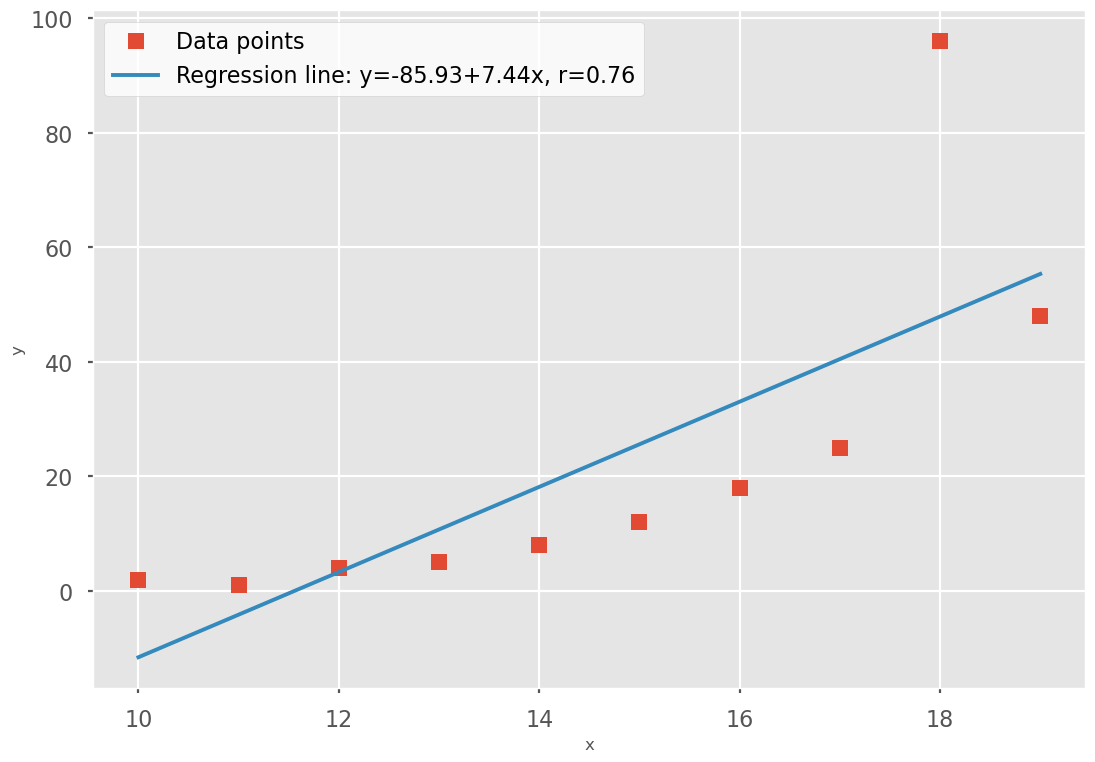

In [170]:
# X-Y Plots With a Regression Line

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')

The red squares represent the observations, while the blue line is the regression line. Its equation is listed in the legend, together with the correlation coefficient.
Remove ads
Heatmaps of Correlation Matrices

The correlation matrix can become really big and confusing when you have a lot of features! Fortunately, you can present it visually as a heatmap where each field has the color that corresponds to its value. You’ll need the correlation matrix:

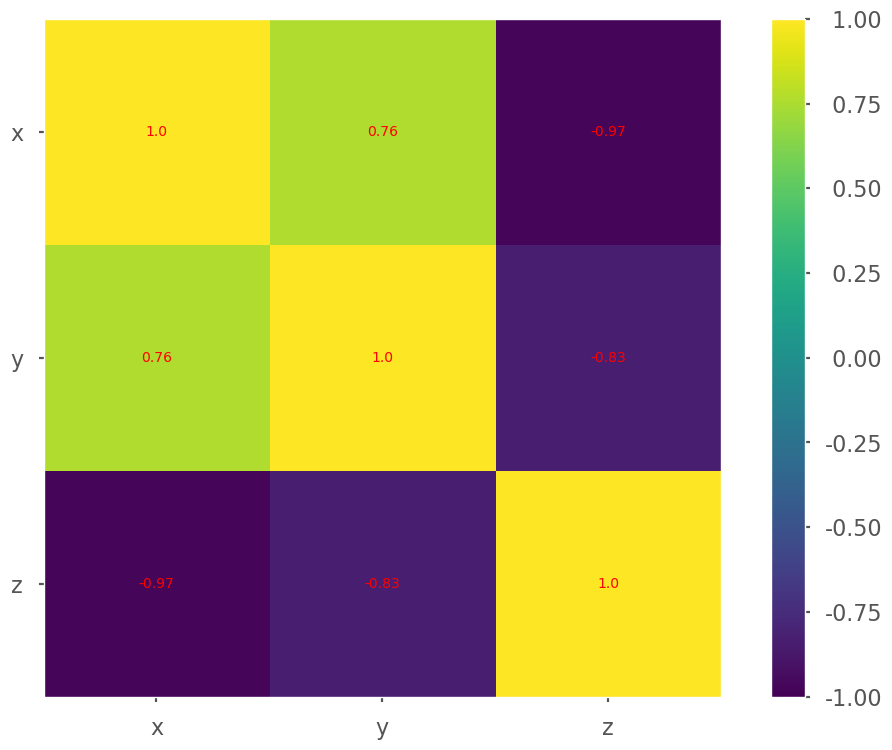

In [171]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
# note here we round the numbers in the correlation matrix 
# with .round(), as they’re going to be shown be on the heatmap.

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')

The result is a table with the coefficients. It sort of looks like the pandas output with colored backgrounds. The colors help you interpret the output. In this example, the yellow color represents the number 1, green corresponds to 0.76, and purple is used for the negative numbers.


## Conclusion
You now know that correlation coefficients are statistics that measure the association between variables or features of datasets. They’re very important in data science and machine learning.

You can now use Python to calculate:

  * Pearson’s product-moment correlation coefficient
  * Spearman’s rank correlation coefficient
  * Kendall’s rank correlation coefficient

Now you can use NumPy, SciPy, and pandas correlation functions and methods to effectively calculate these (and other) statistics, even when you work with large datasets. You also know how to visualize data, regression lines, and correlation matrices with Matplotlib plots and heatmaps.

{% data8page Correlation %}

In [172]:
# HIDDEN
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats

In [173]:
# HIDDEN
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

## Correlation ##

In this section we will develop a measure of how tightly clustered
a scatter diagram is about a straight line. Formally, this is called
measuring *linear association*.

The table `hybrid` contains data on hybrid passenger cars sold in the
United States from 1997 to 2013. The data were adapted from the online
data archive of [Prof. Larry Winner](http://www.stat.ufl.edu/%7Ewinner/)
of the University of Florida. The columns:

- `vehicle`: model of the car
- `year`: year of manufacture
- `msrp`: manufacturer's suggested retail price in 2013 dollars
- `acceleration`: acceleration rate in km per hour per second
- `mpg`: fuel economy in miles per gallon
- `class`: the model's class.

You can download the file via https://users.stat.ufl.edu/~winner/datasets.html

In [174]:
hybrid = pd.read_csv('./data/hybrid_reg.csv')
hybrid.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
1,2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
2,3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
3,4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
4,5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1


The graph below is a scatter plot of `msrp` *versus* `acceleration`.
That means `msrp` is plotted on the vertical axis and `accelaration` on
the horizontal.

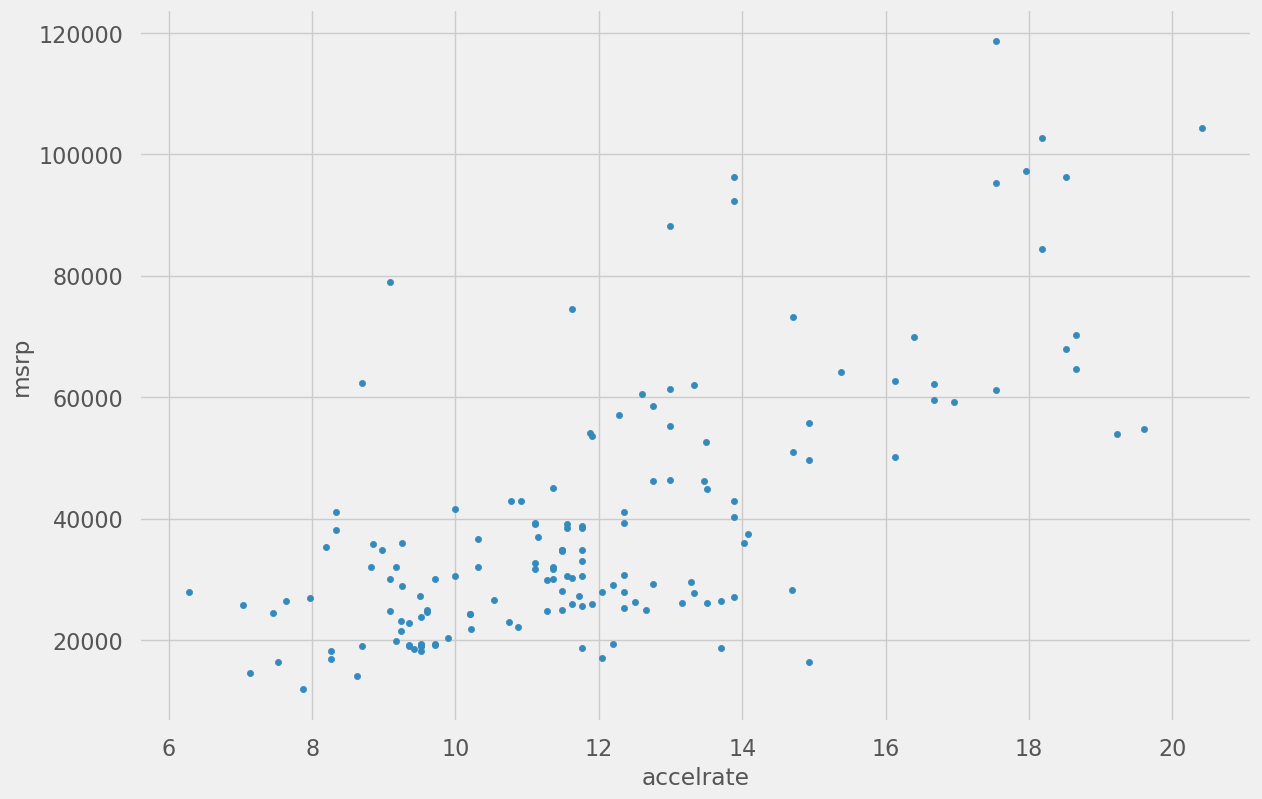

In [175]:
hybrid.plot.scatter('accelrate', 'msrp');

Notice the positive association. The scatter of points is sloping
upwards, indicating that cars with greater acceleration tended to cost
more, on average; conversely, the cars that cost more tended to have
greater acceleration on average. 

The scatter diagram of MSRP versus miles per gallon shows a negative
association. Hybrid cars with higher miles per gallon tended to cost
less, on average. This seems surprising till you consider that cars that
accelerate fast tend to be less fuel efficient and have lower miles per
gallon. As the previous scatter plot showed, those were also the cars
that tended to cost more.

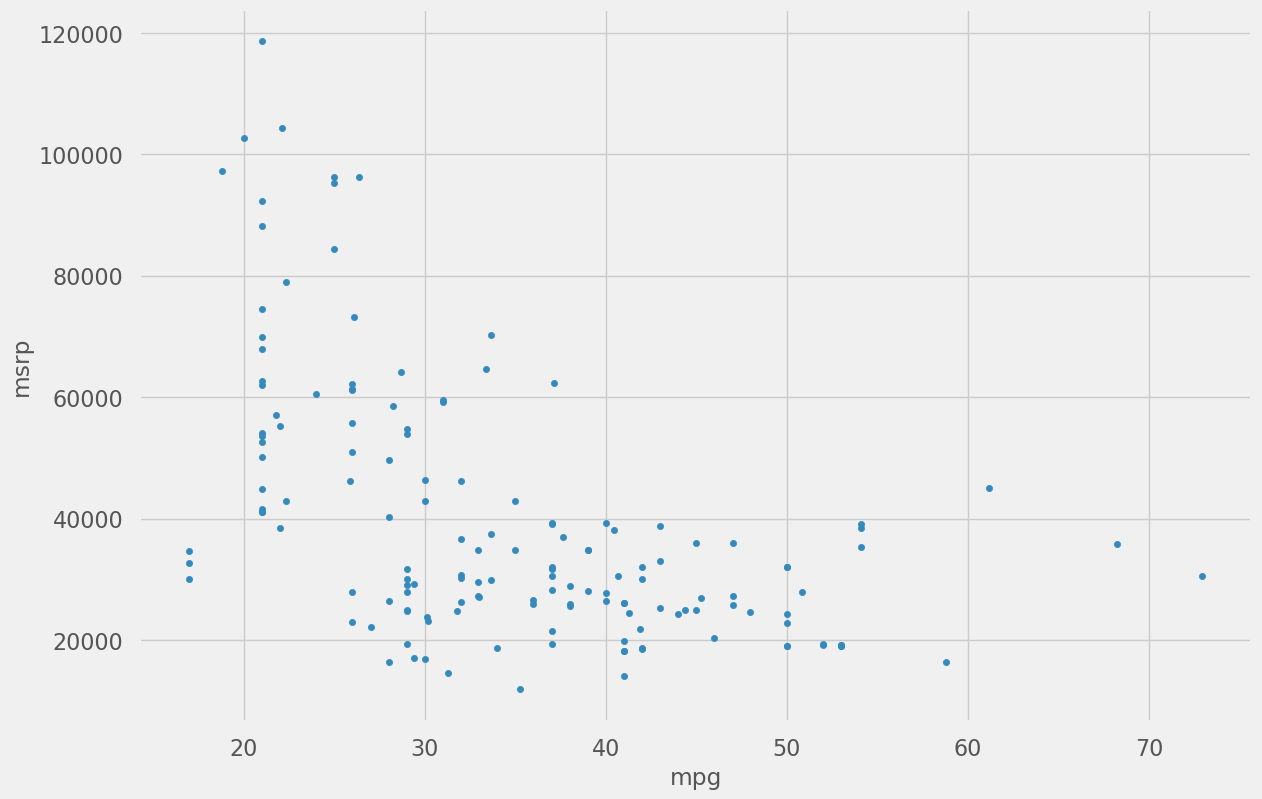

In [176]:
hybrid.plot.scatter('mpg', 'msrp');

Along with the negative association, the scatter diagram of price versus
efficiency shows a non-linear relation between the two variables. The
points appear to be clustered around a curve, not around a straight
line.

If we restrict the data just to the SUV class, however, the association
between price and efficiency is still negative but the relation appears
to be more linear. The relation between the price and acceleration of
SUVs also shows a linear trend, but with a positive slope.

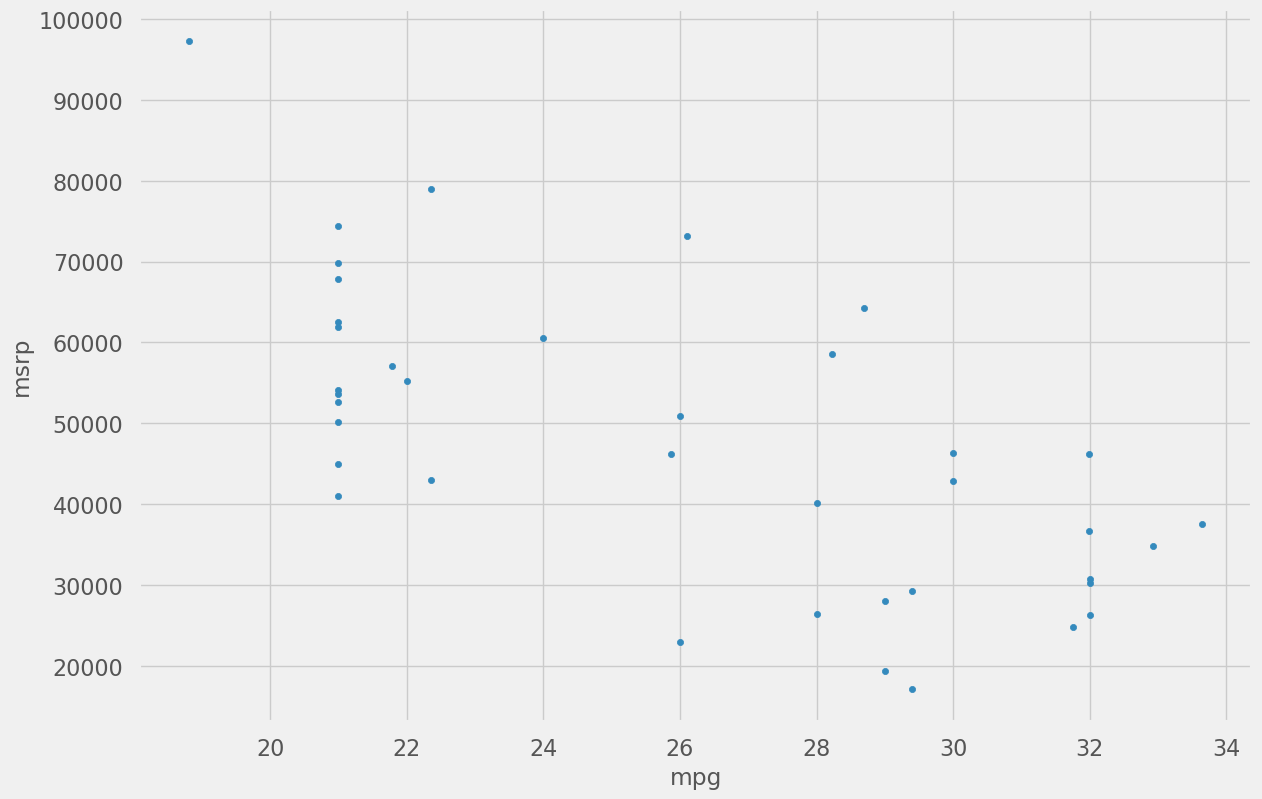

In [177]:
suv = hybrid[hybrid['carclass'] == 'SUV']
suv.plot.scatter('mpg', 'msrp');

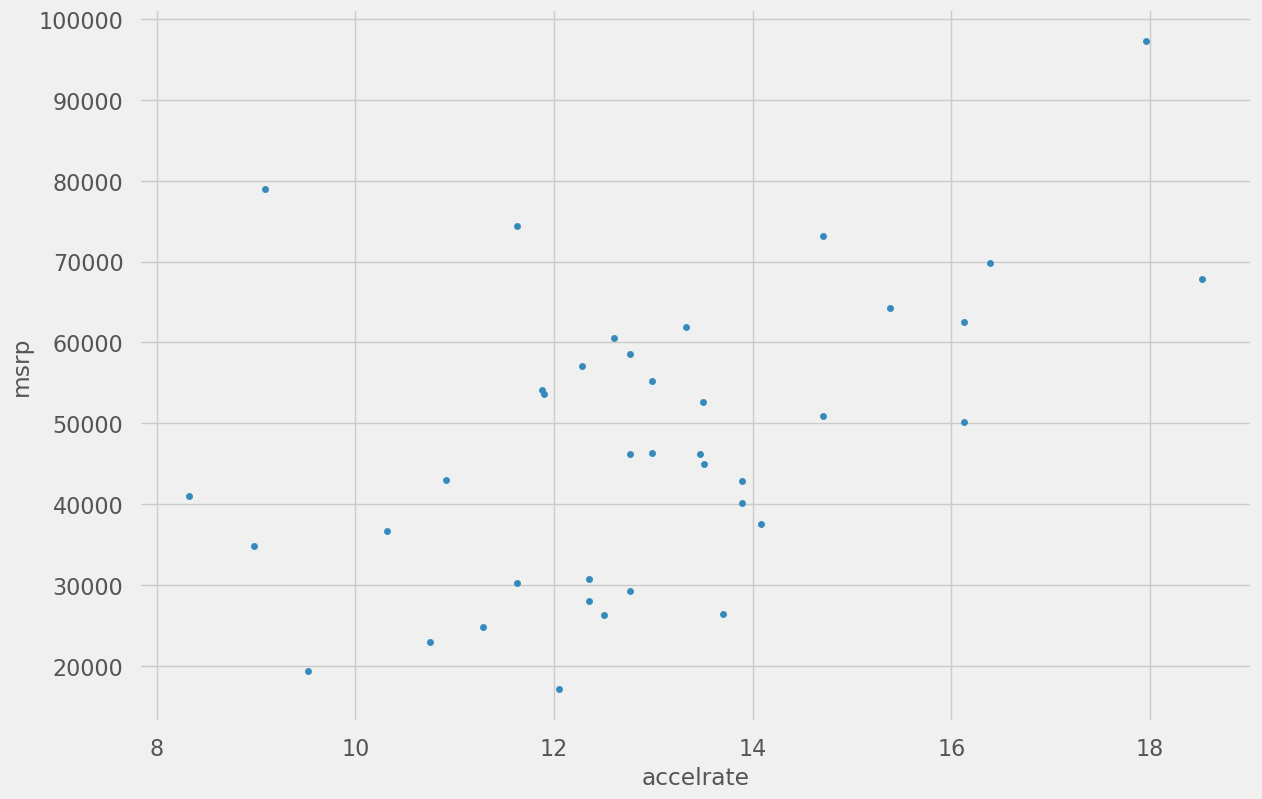

In [178]:
suv.plot.scatter('accelrate', 'msrp');

You will have noticed that we can derive useful information from the
general orientation and shape of a scatter diagram even without paying
attention to the units in which the variables were measured.

Indeed, we could plot all the variables in standard units and the plot
would look the same. This gives us a way to compare the degree of
linearity in two scatter diagrams.

Recall that in an earlier section we defined the function
`standard_units` to convert an array of numbers to standard units.

In [179]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

We can use this function to re-draw the two scatter diagrams for SUVs,
with all the variables measured in standard units.

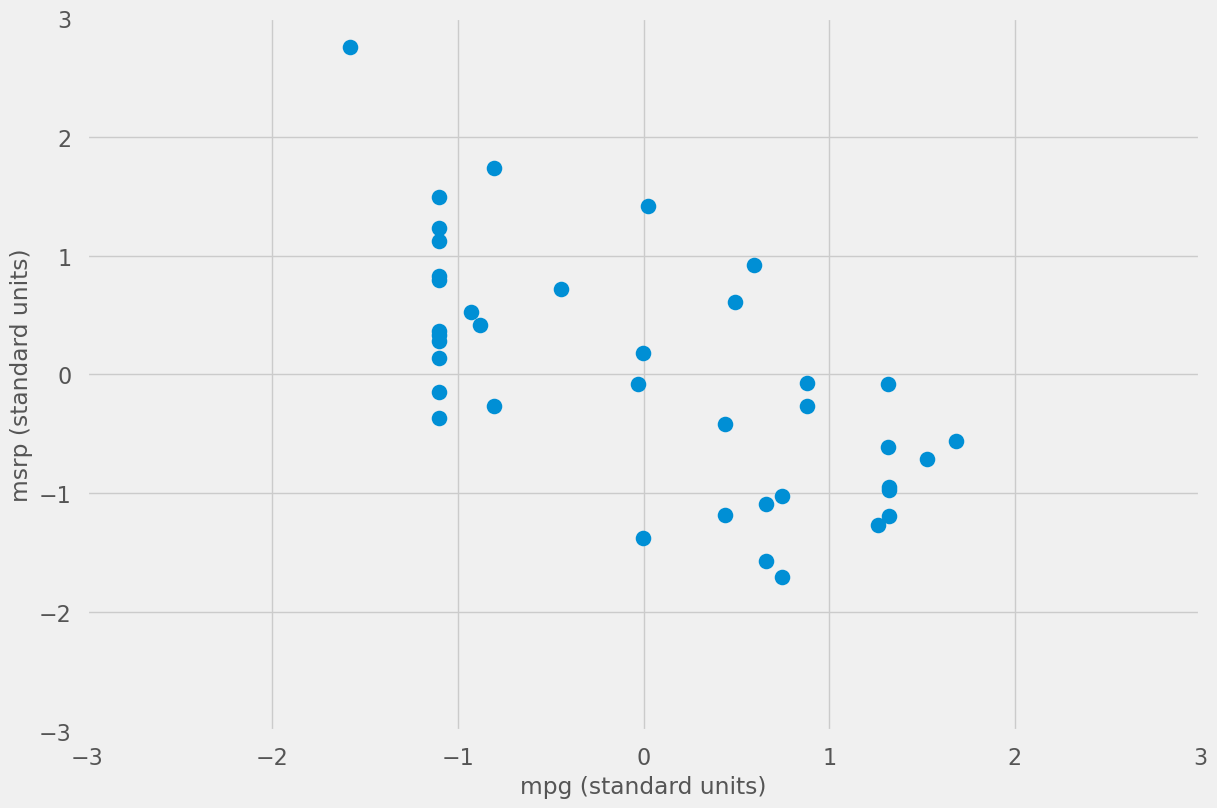

In [180]:
suv_mpg_su = standard_units(suv['mpg'])
suv_msrp_su = standard_units(suv['msrp'])
plt.plot(suv_mpg_su, suv_msrp_su, 'o')
plt.xlabel('mpg (standard units)')
plt.ylabel('msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

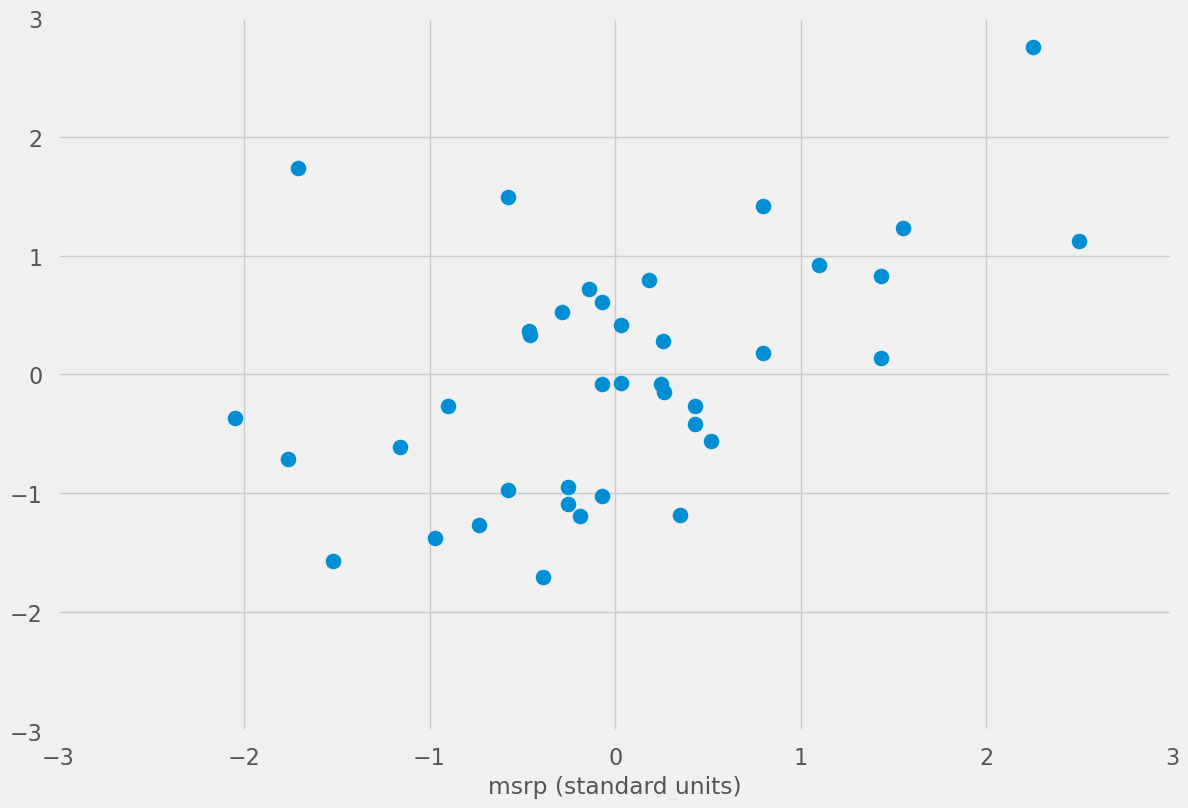

In [181]:
plt.plot(standard_units(suv['accelrate']),
         standard_units(suv['msrp']), 'o')
plt.xlabel('acceleration (standard units)')
plt.xlabel('msrp (standard units)')
plt.xlim(-3, 3)
plt.ylim(-3, 3);

The associations that we see in these figures are the same as those we
saw before. Also, because the two scatter diagrams are now drawn on
exactly the same scale, we can see that the linear relation in the
second diagram is a little more fuzzy than in the first.

We will now define a measure that uses standard units to quantify the
kinds of association that we have seen.


## The correlation coefficient ##

The *correlation coefficient* measures the strength of the linear
relationship between two variables. Graphically, it measures how
clustered the scatter diagram is around a straight line.

The term *correlation coefficient* isn't easy to say, so it is usually
shortened to *correlation* and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by
simulation.

- The correlation coefficient $r$ is a number between $-1$ and 1.
- $r$ measures the extent to which the scatter plot clusters around
  a straight line.
- $r = 1$ if the scatter diagram is a perfect straight line sloping
  upwards, and $r = -1$ if the scatter diagram is a perfect straight
  line sloping downwards.

The function ``r_scatter`` takes a value of $r$ as its argument and
simulates a scatter plot with a correlation very close to $r$. Because
of randomness in the simulation, the correlation is not expected to be
exactly equal to $r$.

Call ``r_scatter`` a few times, with different values of $r$ as the
argument, and see how the scatter plot changes. 

When $r=1$ the scatter plot is perfectly linear and slopes upward. When
$r=-1$, the scatter plot is perfectly linear and slopes downward. When
$r=0$, the scatter plot is a formless cloud around the horizontal axis,
and the variables are said to be *uncorrelated*.

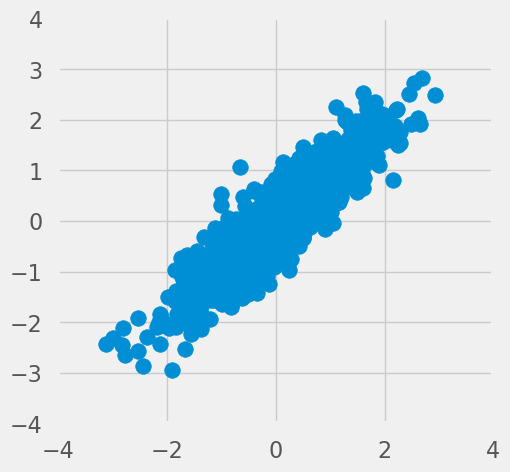

In [182]:
r_scatter(0.9)

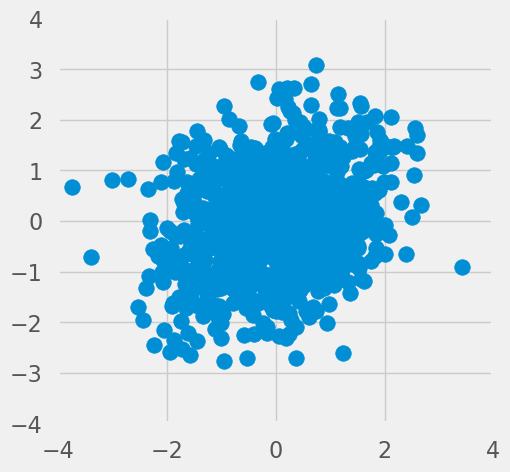

In [183]:
r_scatter(0.25)

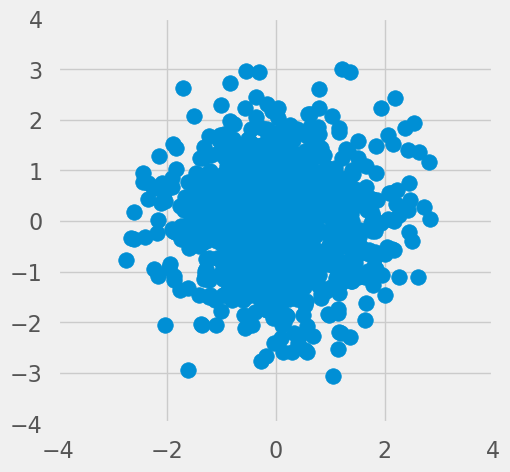

In [184]:
r_scatter(0)

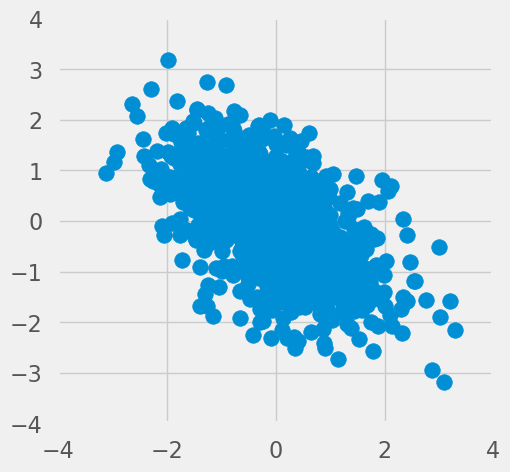

In [185]:
r_scatter(-0.55)

## $r$ is the least squares slope in standard units

Imagine we are interested in the least squares straight line relating the 'mpg' values *in standard units* to the 'mrsp' values *in standard units*.

We would follow the recipe we know from our previous regressions.

In [186]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

Find the best intercept and slope:

In [187]:
from scipy.optimize import minimize
best_c, best_s = minimize(ss_any_line, [0, -0.5],
                          args=(suv_mpg_su, suv_msrp_su)).x
print('Intercept', best_c)
print('Slope', best_s)

Intercept 0.0
Slope -0.6667143664191213


Notice that the intercept is exactly (or very close to) zero.  In fact, it turns out that
this will always be so *when we calculate the line on arrays in standard
units*.

The slope is $r$ - the correlation coefficient.

**The correlation coefficient is the least-squares slope between the two input arrays that have been converted to standard units**.

We will soon see that we can get this same value, without using `minimize`, using a simple calculation on the x and y values.

## $r$ by calculation

The formula for $r$ is not apparent from our observations so far. It has
a mathematical basis that is outside the scope of this class. However,
as you will see, the calculation is straightforward and helps us
understand several of the properties of $r$.

**Formula for $r$**:

**$r$ is the average of the products of the two variables, when both
variables are measured in standard units.**

Here are the steps in the calculation. We will apply the steps to
a simple table of values of $x$ and $y$.

In [188]:
x = np.arange(1, 7)
y = np.array([2, 3, 1, 5, 2, 7])
t = pd.DataFrame()
t['x'] = x
t['y'] = y
t

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


Based on the scatter diagram, we expect that $r$ will be positive but
not equal to 1.

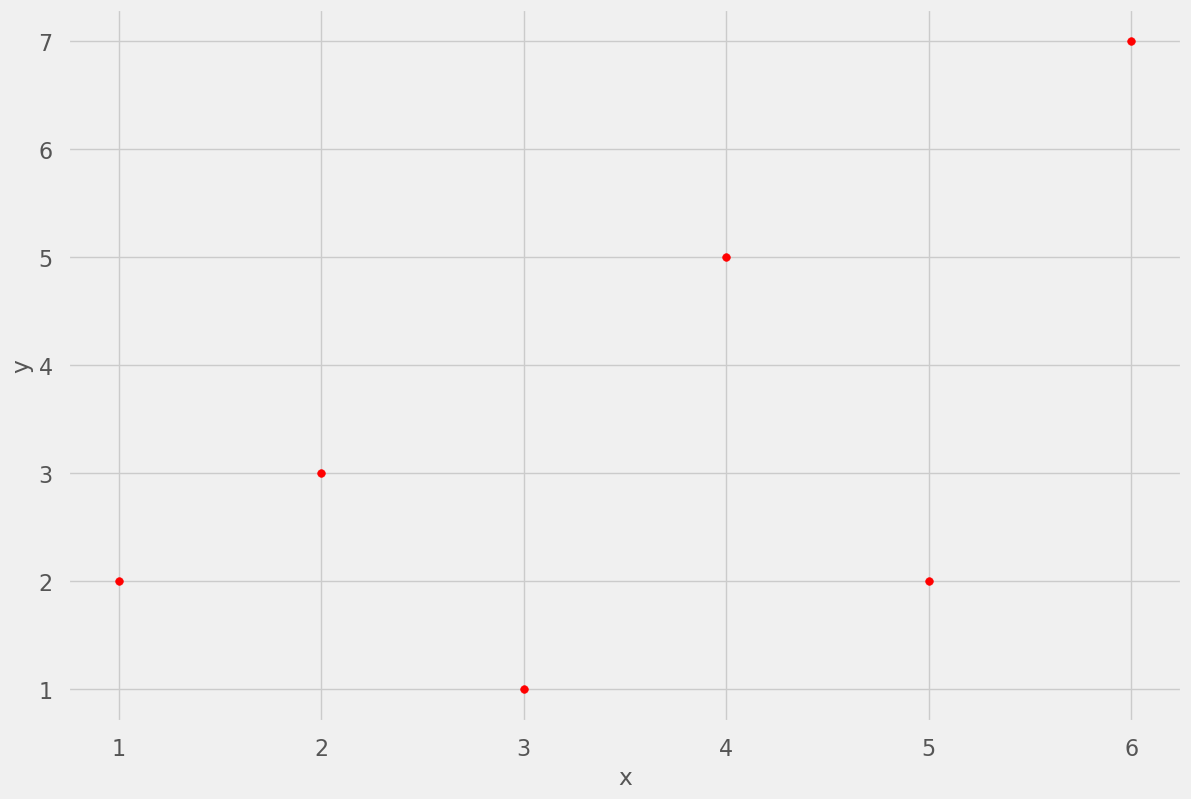

In [189]:
t.plot.scatter('x', 'y', s=30, color='red');

**Step 1.** Convert each variable to standard units.

In [190]:
t_su = pd.DataFrame()
t_su['x (standard units)'] = standard_units(x)
t_su['y (standard units)'] = standard_units(y)
t_su

,x (standard units),y (standard units)
0,-1.46385,-0.648886
1,-0.87831,-0.162221
2,-0.29277,-1.135550
3,0.29277,0.811107
4,0.87831,-0.648886
5,1.46385,1.784436


**Step 2.** Multiply each pair of standard units.

In [191]:
t_product = t_su['x (standard units)'] * t_su['y (standard units)']
t_su['product of standard units'] = t_product
t_su

,x (standard units),y (standard units),product of standard units
0,-1.46385,-0.648886,0.949871
1,-0.87831,-0.162221,0.142481
2,-0.29277,-1.135550,0.332455
3,0.29277,0.811107,0.237468
4,0.87831,-0.648886,-0.569923
5,1.46385,1.784436,2.612146


**Step 3.** $r$ is the average of the products computed in Step 2.

In [192]:
# r is the average of the products of standard units
r = np.mean(t_su['product of standard units'])
r

0.6174163971897709

As expected, $r$ is positive but not equal to 1.


## Properties of $r$

The calculation shows that:

- $r$ is a pure number. It has no units. This is because $r$ is based on
  standard units.
- $r$ is unaffected by changing the units on either axis. This too is
  because $r$ is based on standard units.
- $r$ is unaffected by switching the axes. Algebraically, this is
  because the product of standard units does not depend on which
  variable is called $x$ and which $y$. Geometrically, switching axes
  reflects the scatter plot about the line $y=x$, but does not change
  the amount of clustering nor the sign of the association.

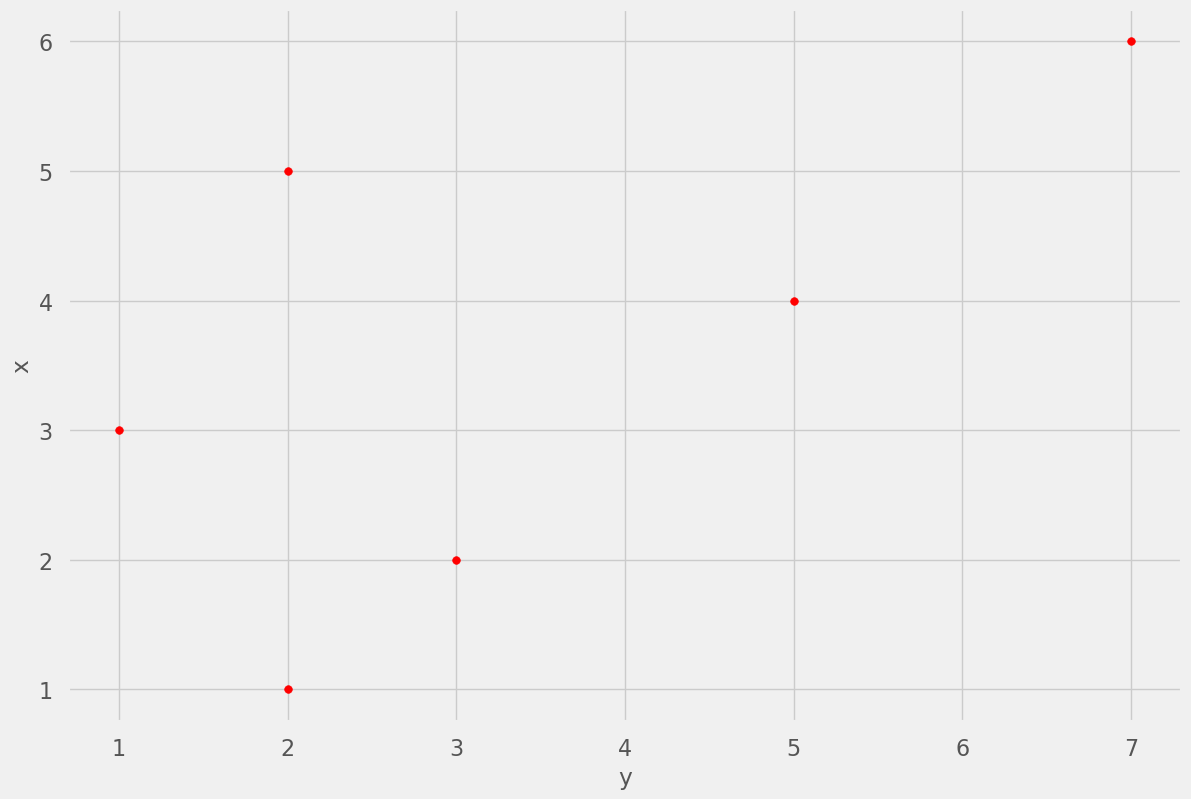

In [193]:
t.plot.scatter('y', 'x', s=30, color='red');

### The `correlation` function

We are going to be calculating correlations repeatedly, so it will help
to define a function that computes it by performing all the steps
described above. Let's define a function ``correlation`` that takes
a table and the labels of two columns in the table. The function returns
$r$, the mean of the products of those column values in standard units.

In [194]:
def correlation(t, x_name, y_name):
    """ Correlation by calculation
    """
    x = t[x_name]
    y = t[y_name]
    return np.mean(standard_units(x) * standard_units(y))

This is a `minimize` version of the function - it will return very similar results:

In [195]:
def correlation_minimize(t, x_name, y_name):
    """ Correlation by minimization
    """
    x = t[x_name]
    y = t[y_name]
    x_su, y_su = standard_units(x), standard_units(y)
    intercept, slope = minimize(ss_any_line, [0, 1], args=(x_su, y_su)).x
    if not np.isclose(intercept, 0):
        print('Oh dear, intercept not near 0')
    return slope

Let's call the function on the ``x`` and ``y`` columns of ``t``. The
function returns the same answer to the correlation between $x$ and $y$
as we got by direct application of the formula for $r$. 

In [196]:
correlation(t, 'x', 'y')

0.6174163971897709

The minimize version returns almost exactly the same result:

In [197]:
correlation_minimize(t, 'x', 'y')

0.6174163997127619

As we noticed, the order in which the variables are specified doesn't
matter.

In [198]:
correlation(t, 'y', 'x')

0.6174163971897709

Calling ``correlation`` on columns of the table ``suv`` gives us the
correlation between price and miles per gallon as well as the
correlation between price and acceleration.

In [199]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [200]:
correlation(suv, 'accelrate', 'msrp')

0.4869979927995918

These values confirm what we had observed: 

- There is a negative association between price and efficiency, whereas
  the association between price and acceleration is positive.
- The linear relation between price and acceleration is a little weaker
  (correlation about 0.5) than between price and miles per gallon
  (correlation about -0.67).

Correlation is a simple and powerful concept, but it is sometimes
misused. Before using $r$, it is important to be aware of what
correlation does and does not measure.


### Association is not Causation

Correlation only measures association. Correlation does not imply
causation. Though the correlation between the weight and the math
ability of children in a school district may be positive, that does not
mean that doing math makes children heavier or that putting on weight
improves the children's math skills. Age is a confounding variable:
older children are both heavier and better at math than younger
children, on average.


### Correlation Measures *Linear* Association

Correlation measures only one kind of association – linear. Variables
that have strong non-linear association might have very low correlation.
Here is an example of variables that have a perfect quadratic relation
$y = x^2$ but have correlation equal to 0.

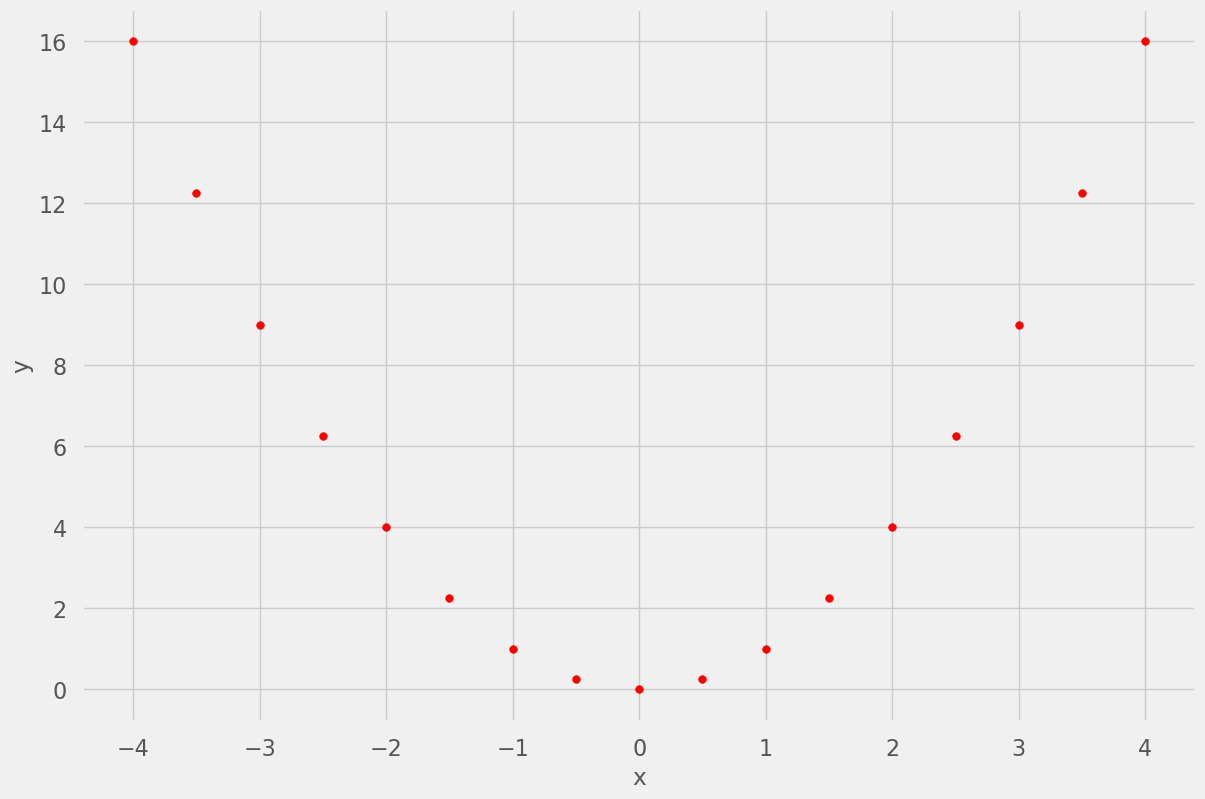

In [201]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = pd.DataFrame()
nonlinear['x'] = new_x
nonlinear['y'] = new_x ** 2
nonlinear.plot.scatter('x', 'y', s=30, color='r');

In [202]:
correlation(nonlinear, 'x', 'y')

0.0

### Correlation is Affected by Outliers

Outliers can have a big effect on correlation. Here is an example where
a scatter plot for which $r$ is equal to 1 is turned into a plot for
which $r$ is equal to 0, by the addition of just one outlying point.

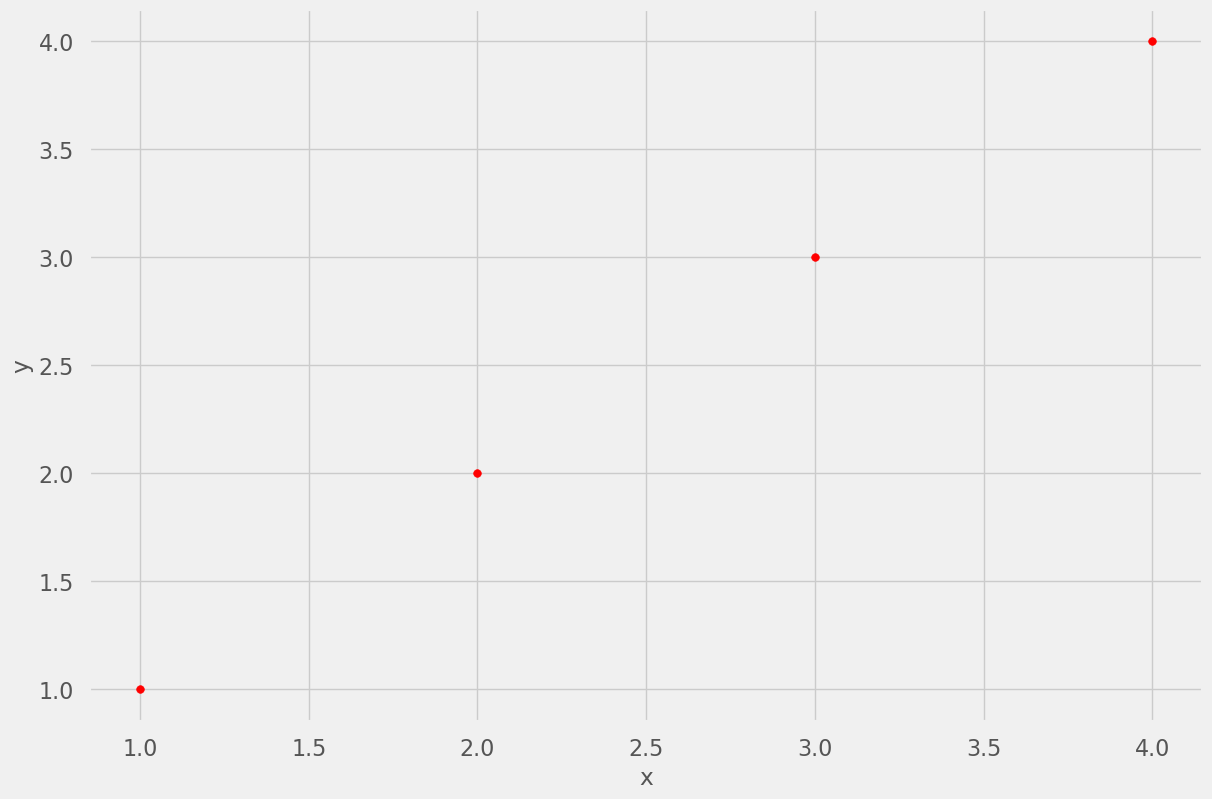

In [203]:
line = pd.DataFrame()
line['x'] = np.array([1, 2, 3, 4])
line['y'] = np.array([1, 2, 3, 4])
line.plot.scatter('x', 'y', s=30, color='r');

In [204]:
correlation(line, 'x', 'y')

1.0

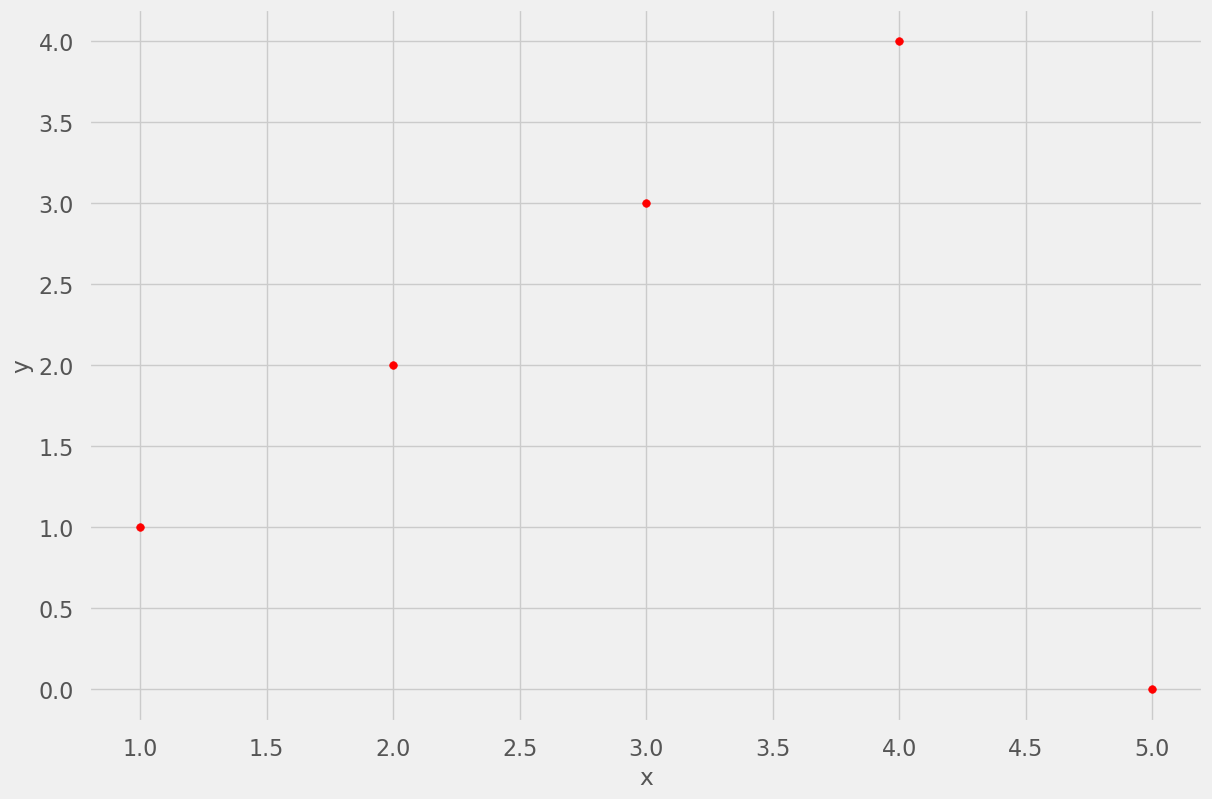

In [205]:
outlier = pd.DataFrame()
outlier['x'] = np.array([1, 2, 3, 4, 5])
outlier['y'] = np.array([1, 2, 3, 4, 0])
outlier.plot.scatter('x', 'y', s=30, color='r');

In [206]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations Should be Interpreted with Care

Correlations based on aggregated data can be misleading. As an example,
here are data on the Critical Reading and Math SAT scores in 2014. There
is one point for each of the 50 states and one for Washington, D.C. The
column ``Participation Rate`` contains the percent of high school
seniors who took the test. The next three columns show the average score
in the state on each portion of the test, and the final column is the
average of the total scores on the test.

You can download the file via [sat2014.csv]({{ site.baseurl
}}/data/sat2014.csv).

In [207]:
sat2014 = pd.read_csv('./data/sat2014.csv').sort_values('State')
sat2014.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cfd-uob-master/data/sat2014.csv'

The scatter diagram of Math scores versus Critical Reading scores is
very tightly clustered around a straight line; the correlation is close
to 0.985.

In [ ]:
sat2014.plot.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

That's an extremely high correlation. But it's important to note that
this does not reflect the strength of the relation between the Math and
Critical Reading scores of *students*.

The data consist of average scores in each state. But states don't take
tests – students do. The data in the table have been created by lumping
all the students in each state into a single point at the average values
of the two variables in that state. But not all students in the state
will be at that point, as students vary in their performance. If you
plot a point for each student instead of just one for each state, there
will be a cloud of points around each point in the figure above. The
overall picture will be more fuzzy. The correlation between the Math and
Critical Reading scores of the students will be *lower* than the value
calculated based on state averages.

Correlations based on aggregates and averages are called *ecological
correlations* and are frequently reported. As we have just seen, they
must be interpreted with care.


### Serious or tongue-in-cheek?

In 2012,
a [paper](http://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20%28NEJM%29.pdf)
in the respected New England Journal of Medicine examined the relation
between chocolate consumption and Nobel Prizes in a group of countries.
The [Scientific
American](http://blogs.scientificamerican.com/the-curious-wavefunction/chocolate-consumption-and-nobel-prizes-a-bizarre-juxtaposition-if-there-ever-was-one/)
responded seriously whereas
[others](http://www.reuters.com/article/2012/10/10/us-eat-chocolate-win-the-nobel-prize-idUSBRE8991MS20121010#vFdfFkbPVlilSjsB.97)
were more relaxed. You are welcome to make your own decision! The
following graph, provided in the paper, should motivate you to go and
take a look.

![]({{ site.baseurl }}/images/chocoNobel.png)

{% data8page Correlation %}